In [4]:
#倒入一些必要的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from pylab import mpl
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [6]:
df=pd.read_csv("D:\\本科阶段\毕业论文8214190205\代码\Acturalyy\sihanliangfix.csv",sep=',',encoding='ANSI')
df

富氧率      透气性指数       冷风流量        鼓风动能     炉腹煤气指数       理论燃烧温度  \
0     1.938472  16.591613  28.949071  128.508333  67.167875  2183.058333   
1     1.943707  16.854883  28.736226  130.719665  66.645565  2200.154812   
2     1.953777  17.581653  28.495088  131.531381  66.133808  2196.058577   
3     1.888147  17.751958  28.637521  131.795833  66.371542  2180.158333   
4     1.840605  17.121556  28.463477  130.041841  65.945105  2187.577406   
...        ...        ...        ...         ...        ...          ...   
1198  2.308857  17.435958  28.968188  138.774059  68.047490  2197.815900   
1199  2.291922  17.877862  29.065971  141.783333  68.243625  2196.433333   
1200  2.349177  17.394305  28.395172  132.221757  66.850879  2189.343096   
1201  2.326612  17.908092  28.911029  140.368201  67.993389  2195.209205   
1202  2.291748  18.306729  29.063862  144.137500  68.287250  2194.975000   

          冷风压力        实际风速         热风温度   前硅含量    硅含量  
0     0.417408  268.366667  1202.795833  0.430  0.406  
1     0.411940  272.267782  1219.867364  0.406  0.597  
2     0.404041  274.000000  1218.579079  0.597  0.396  
3     0.402645  273.345833  1203.362917  0.396  0.390  
4     0.406177  272.761506  1220.141004  0.390  0.307  
...        ...         ...          ...    ...    ...  
1198  0.403358  278.740586  1216.974477  0.514  0.493  
1199  0.399912  281.258333  1215.397083  0.493  0.510  
1200  0.398948  275.167364  1214.821339  0.510  0.406  
1201  0.398741  280.502092  1215.439749  0.406  0.423  
1202  0.395782  283.620833  1215.125833  0.423  0.408  

[1203 rows x 11 columns]

In [7]:
df.isnull().sum()

富氧率       0
透气性指数     0
冷风流量      0
鼓风动能      0
炉腹煤气指数    0
理论燃烧温度    0
冷风压力      0
实际风速      0
热风温度      0
前硅含量      0
硅含量       0
dtype: int64

Text(0.5, 1.0, '原始硅含量变化图')

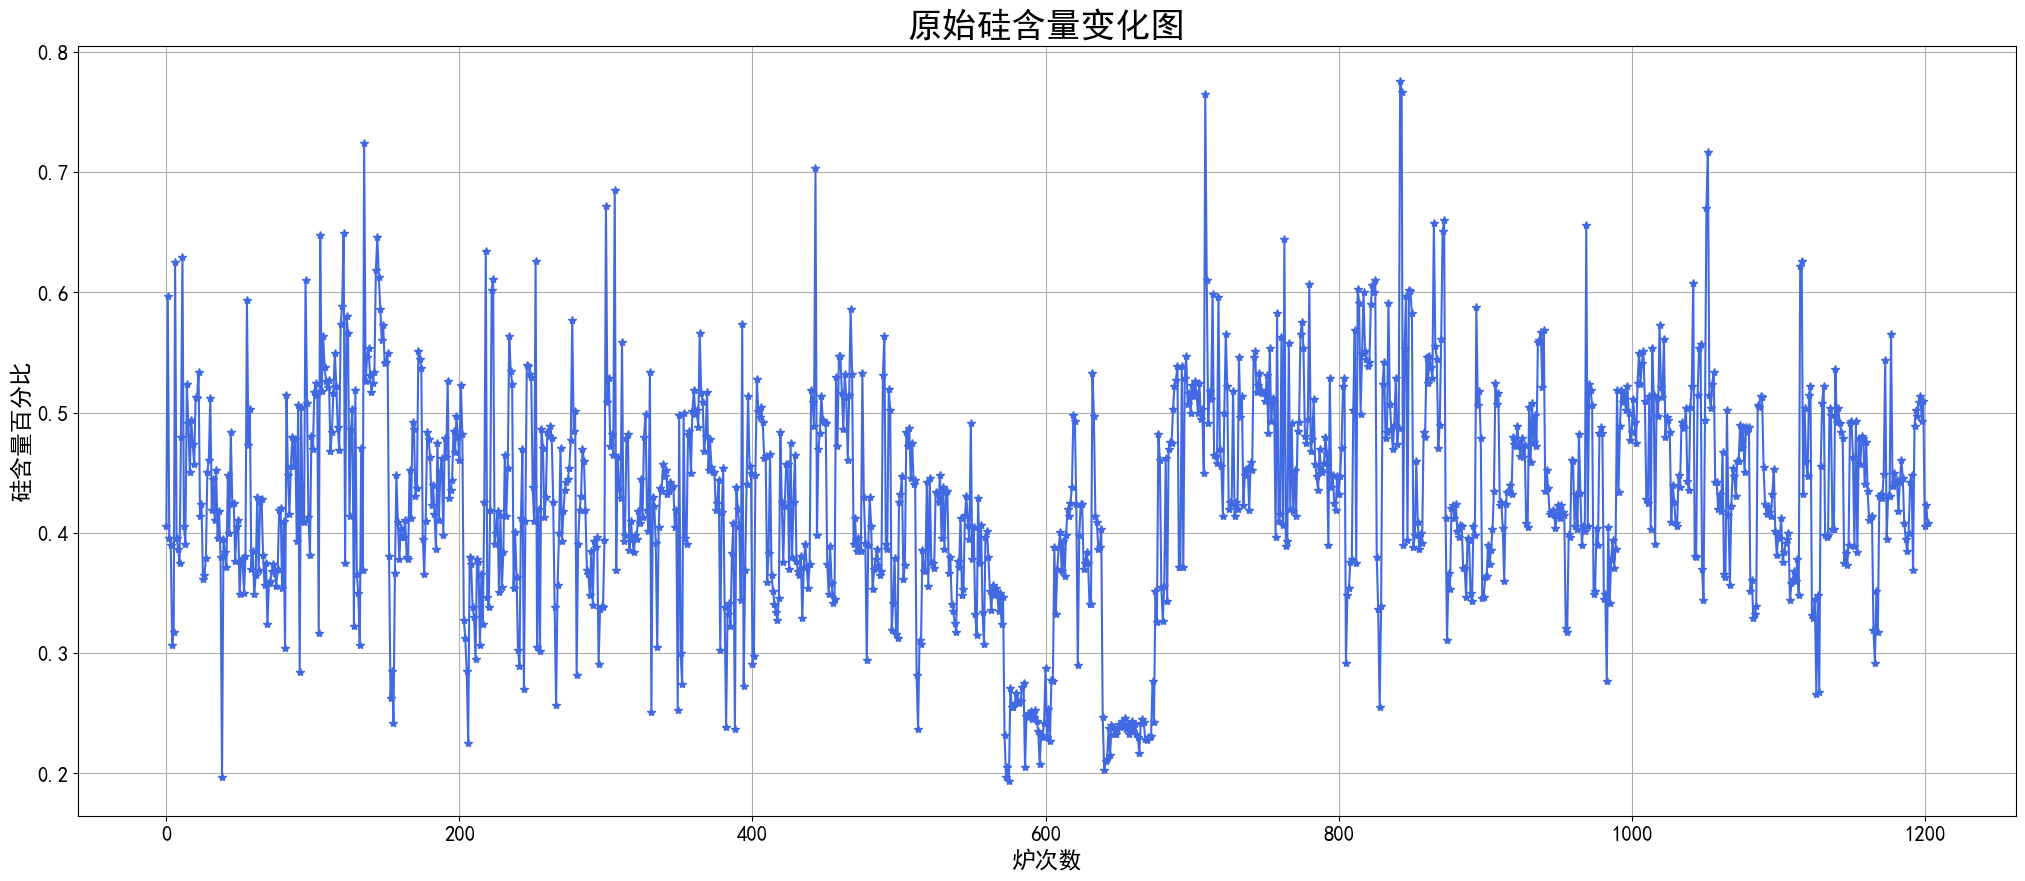

In [8]:
#将 数据绘制成折线图
plot=df['硅含量'].plot(figsize=(25,10),color='#4169E1', grid=True,fontsize=15,marker='*')
plt.ylabel('硅含量百分比',fontsize=17)
plt.xlabel('炉次数',fontsize=17)
plt.title('原始硅含量变化图',fontsize=25)
#plt.savefig('D:\\毕业论文8214190205\\picture\\'+'初始.jpg')

<BarContainer object of 1203 artists>

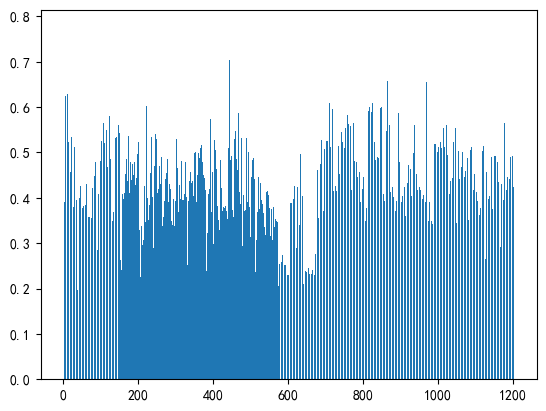

In [13]:
plt.bar(np.arange(1203),df['硅含量'])

<AxesSubplot:>

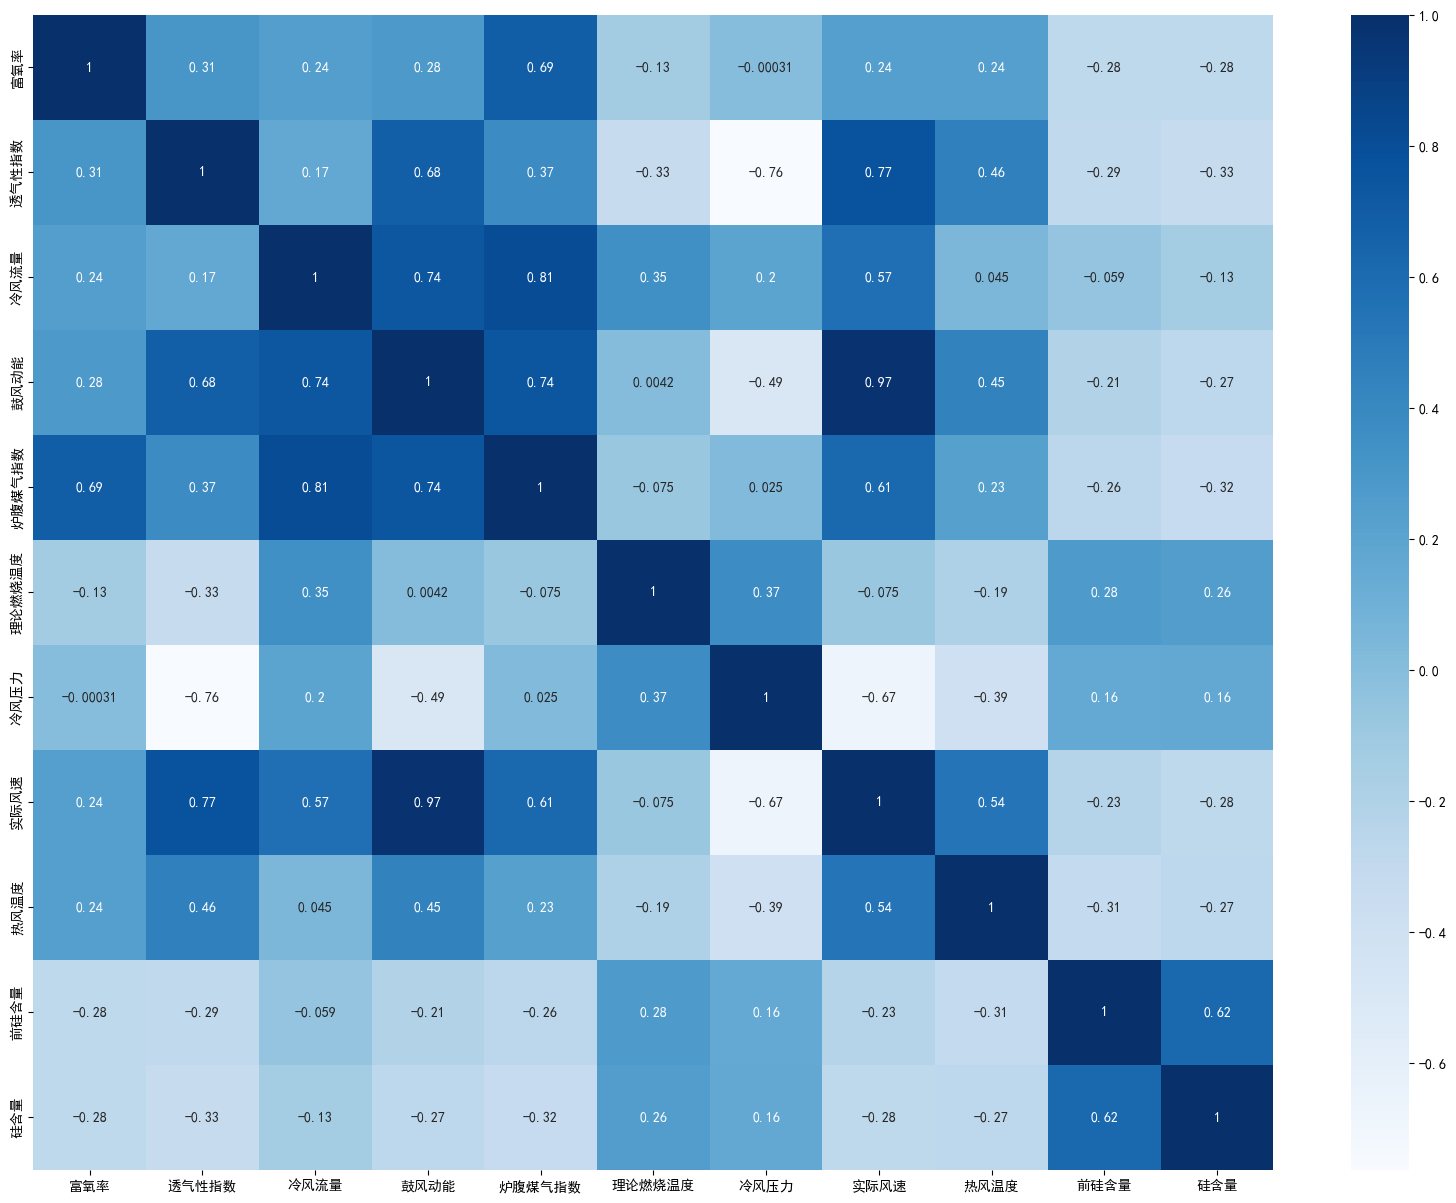

In [14]:
#画出热力图，查看字段间的相关性
#相关系数的绝对值在【0.5,1】之间是强相关  【0.2,0.5】之间是有一定相关  小于0.1或0.05是无相关
si_corr = df.corr()
fig=plt.figure(figsize=(20,15))
sns.heatmap(si_corr,annot=True,cmap="Blues")
#注重分析硅含量字段和其他字段的关系

# 数据预处理
1.特征值选择
2.归一化
3.箱线图异常值处理

In [15]:
#进行归一化操作,但硅含量不归一化
from sklearn import preprocessing
df1=df #复制df
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df)
df = pd.DataFrame(df0, columns=df.columns)
df['硅含量']=df1['硅含量']
df['前硅含量']=df1['前硅含量']
df

富氧率     透气性指数      冷风流量      鼓风动能    炉腹煤气指数    理论燃烧温度      冷风压力  \
0     0.472906  0.336046  0.656185  0.529822  0.706049  0.330388  0.754089   
1     0.479256  0.406108  0.560532  0.591527  0.619832  0.451042  0.617478   
2     0.491470  0.599518  0.452164  0.614176  0.535358  0.422134  0.420133   
3     0.411867  0.644840  0.516174  0.621556  0.574600  0.309922  0.385246   
4     0.354203  0.477076  0.437958  0.572613  0.504209  0.362280  0.473507   
...        ...       ...       ...       ...       ...       ...       ...   
1198  0.922150  0.560745  0.664777  0.816274  0.851245  0.434535  0.403073   
1199  0.901610  0.678346  0.708721  0.900244  0.883620  0.424778  0.316980   
1200  0.971055  0.549661  0.407261  0.633441  0.653723  0.374741  0.292887   
1201  0.943686  0.686391  0.639089  0.860757  0.842315  0.416139  0.287712   
1202  0.901398  0.792477  0.707773  0.965934  0.890822  0.414487  0.213810   

          实际风速      热风温度   前硅含量    硅含量  
0     0.479684  0.583244  0.430  0.406  
1     0.610467  0.908703  0.406  0.597  
2     0.668540  0.884142  0.597  0.396  
3     0.646609  0.594055  0.396  0.390  
4     0.627019  0.913919  0.390  0.307  
...        ...       ...    ...    ...  
1198  0.827467  0.853551  0.514  0.493  
1199  0.911874  0.823479  0.493  0.510  
1200  0.707675  0.812503  0.510  0.406  
1201  0.886521  0.824293  0.406  0.423  
1202  0.991076  0.818308  0.423  0.408  

[1203 rows x 11 columns]

In [16]:
y1=df['富氧率']
y2=df['透气性指数']
y3=df['冷风流量']
y4=df['鼓风动能']
y5=df['炉腹煤气指数']
y6=df['理论燃烧温度']
y7=df['冷风压力']
y8=df['实际风速']
y9=df['热风温度']
y10=df['前硅含量']
y11=df['硅含量']

In [17]:
#保存原值
Y1=df['富氧率']
Y2=df['透气性指数']
Y3=df['冷风流量']
Y4=df['鼓风动能']
Y5=df['炉腹煤气指数']
Y6=df['理论燃烧温度']
Y7=df['冷风压力']
Y8=df['实际风速']
Y9=df['热风温度']
Y10=df['前硅含量']
Y11=df['硅含量']

<function matplotlib.pyplot.show(close=None, block=None)>

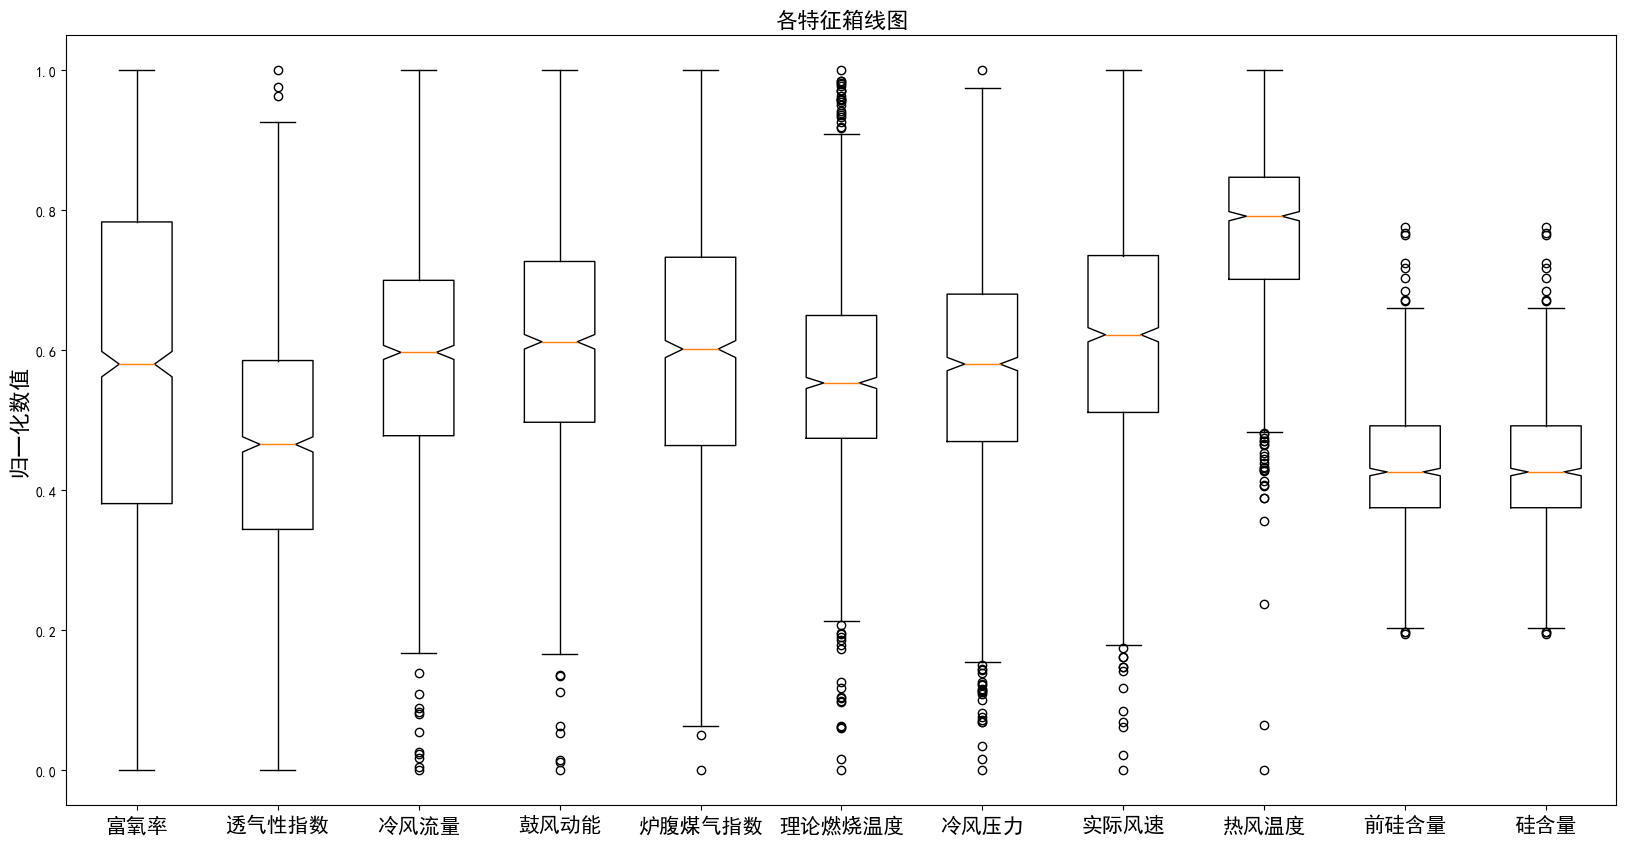

In [18]:
plt.figure(figsize=(20,10))
labels=['富氧率','透气性指数','冷风流量','鼓风动能','炉腹煤气指数','理论燃烧温度','冷风压力','实际风速','热风温度','前硅含量','硅含量']
plt.boxplot([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11],notch=True,labels=labels,meanline=True)
plt.title('各特征箱线图',fontsize=16)
plt.ylabel('归一化数值',fontsize=16)
plt.xticks(range(1, 12), ['富氧率','透气性指数','冷风流量','鼓风动能','炉腹煤气指数','理论燃烧温度','冷风压力','实际风速','热风温度','前硅含量','硅含量'], fontsize=15)
plt.show

大部分特征值都有异常点

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

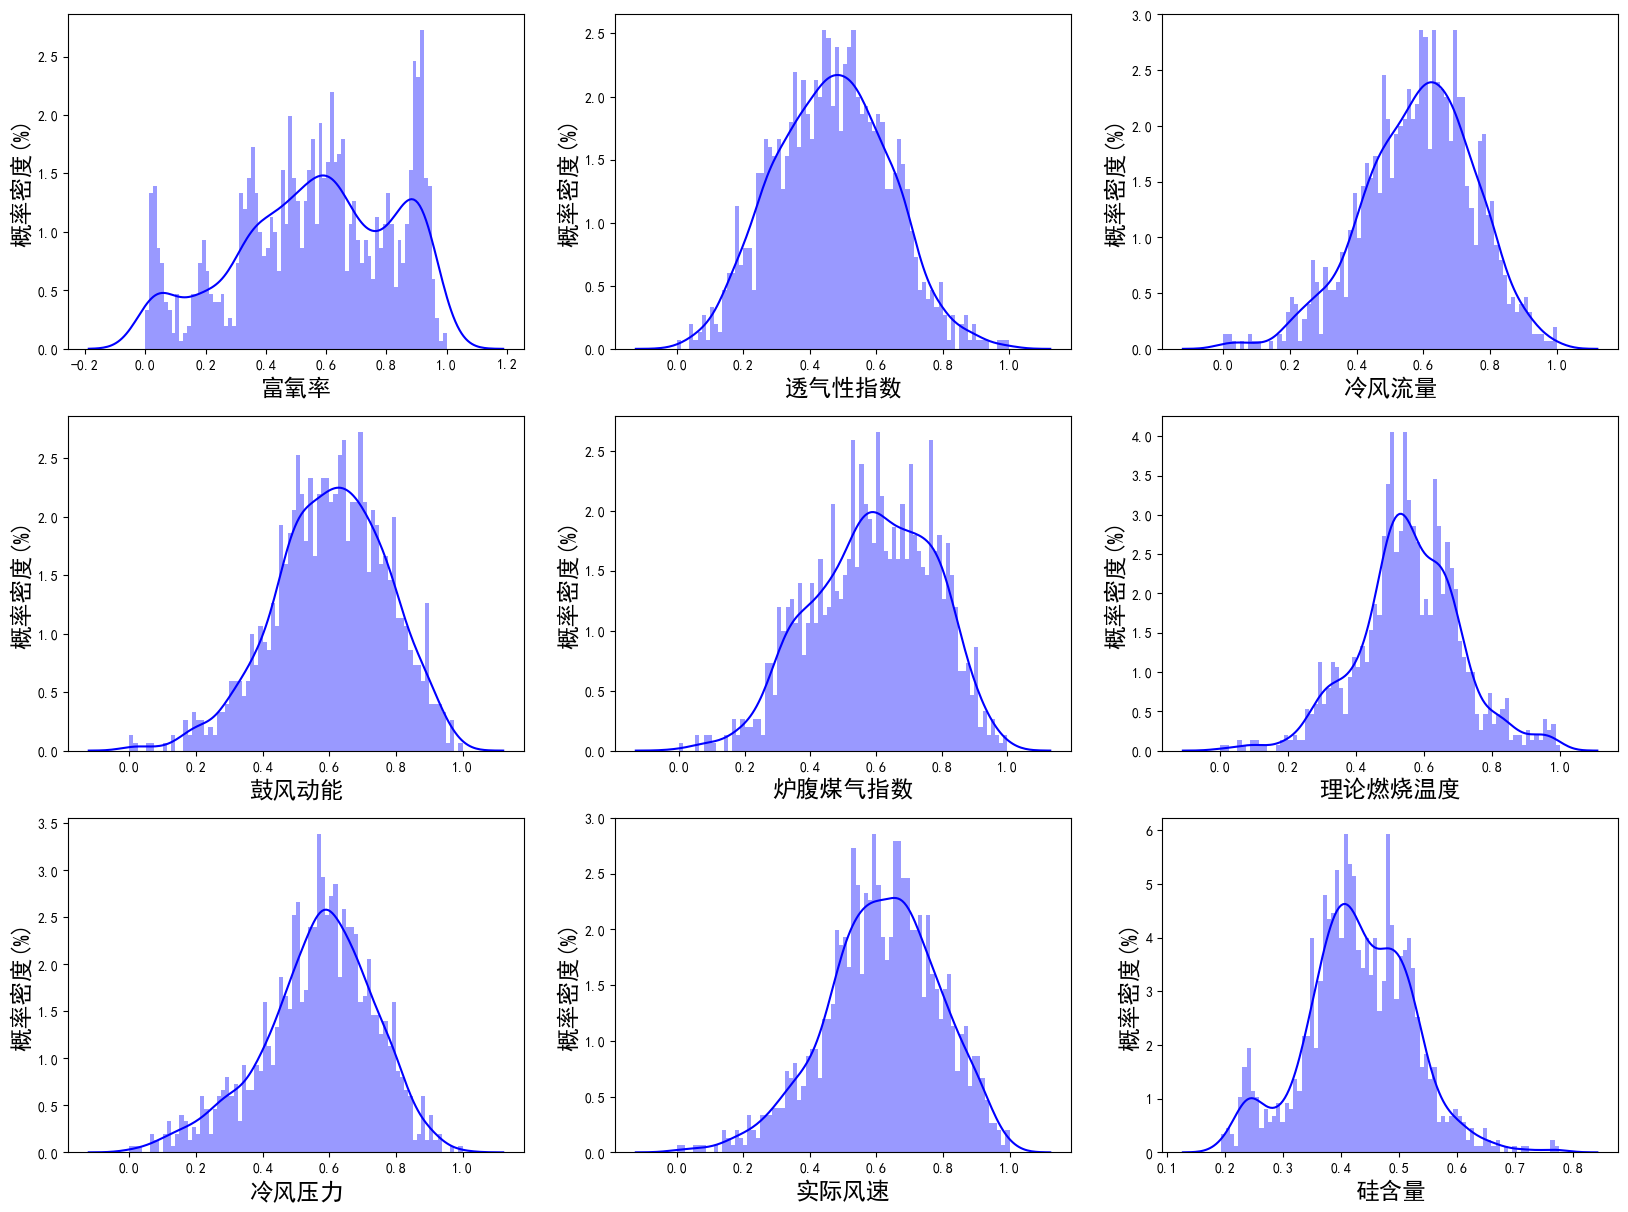

In [19]:
#绘制子图
p=plt.figure(figsize=(20,20))#设置画布大小
#子图1
ax1=p.add_subplot(4,3,1)#三行四列第一幅
sns.distplot(y1,color='b',bins=80,kde=True)
plt.xlabel('富氧率',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图2
ax1=p.add_subplot(4,3,2)#三行四列第2幅
sns.distplot(y2,color='b',bins=80,kde=True)
plt.xlabel('透气性指数',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图3
ax1=p.add_subplot(4,3,3)#三行四列第2幅
sns.distplot(y3,color='b',bins=80,kde=True)
plt.xlabel('冷风流量',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图4
ax1=p.add_subplot(4,3,4)#三行四列第2幅
sns.distplot(y4,color='b',bins=80,kde=True)
plt.xlabel('鼓风动能',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图5
ax1=p.add_subplot(4,3,5)#三行四列第2幅
sns.distplot(y5,color='b',bins=80,kde=True)
plt.xlabel('炉腹煤气指数',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图6
ax1=p.add_subplot(4,3,6)#三行四列第2幅
sns.distplot(y6,color='b',bins=80,kde=True)
plt.xlabel('理论燃烧温度',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图7
ax1=p.add_subplot(4,3,7)#三行四列第2幅
sns.distplot(y7,color='b',bins=80,kde=True)
plt.xlabel('冷风压力',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图8
ax1=p.add_subplot(4,3,8)#三行四列第2幅
sns.distplot(y8,color='b',bins=80,kde=True)
plt.xlabel('实际风速',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图9
ax1=p.add_subplot(4,3,9)#三行四列第2幅
sns.distplot(y11,color='b',bins=80,kde=True)
plt.xlabel('硅含量',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=17)
#子图10
#ax1=p.add_subplot(4,3,10)#三行四列第2幅
#sns.distplot(y11,color='b',bins=80,kde=True)
#plt.ylabel('概率密度(%)',fontsize=17)
plt.show()

In [20]:
from copy import deepcopy
dff=deepcopy(df) #深度复制

In [21]:
statistics=df['富氧率'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.562557
std         0.258583
min         0.000000
25%         0.380888
50%         0.580154
75%         0.783280
max         1.000000
Name: 富氧率, dtype: float64
最大估计值为: 1.3868682363963323
最小估计值为: -0.22270051984741923


In [22]:
#硅含量清洗
statistics=df['硅含量'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.430116
std         0.091315
min         0.194000
25%         0.375000
50%         0.426000
75%         0.492000
max         0.776000
Name: 硅含量, dtype: float64
最大估计值为: 0.6675
最小估计值为: 0.1995


In [23]:
dff.loc[dff['硅含量']<Lb,'硅含量']=0.1996 #用最小量代替
dff.loc[dff['前硅含量']<Lb,'前硅含量']=0.1996 #用最小量代替

In [24]:
dff.loc[dff['硅含量']>Ub,'硅含量']=0.6674 #用最大量代替
dff.loc[dff['前硅含量']>Ub,'前硅含量']=0.6674 #用最大量代替

In [25]:
#透气性指数清洗
statistics=df['透气性指数'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.465899
std         0.169556
min         0.000000
25%         0.344001
50%         0.465439
75%         0.585279
max         1.000000
Name: 透气性指数, dtype: float64
最大估计值为: 0.9471950413510479
最小估计值为: -0.01791507152852545


In [26]:
dff.loc[dff['透气性指数']<Lb,'透气性指数']=Lb+0.00001 #用最小量代替
dff.loc[dff['透气性指数']>Ub,'透气性指数']=Ub-0.00001 #用最大量代替

In [27]:
#冷风流量清洗
statistics=df['冷风流量'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.584310
std         0.166434
min         0.000000
25%         0.477898
50%         0.596896
75%         0.699845
max         1.000000
Name: 冷风流量, dtype: float64
最大估计值为: 1.0327661154159808
最小估计值为: 0.14497772495328887


In [28]:
dff.loc[dff['冷风流量']<Lb,'冷风流量']=Lb+0.00001 #用最小量代替
dff.loc[dff['冷风流量']>Ub,'冷风流量']=Ub-0.00001 #用最大量代替

In [29]:
#鼓风动能
statistics=df['鼓风动能'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.604733
std         0.167558
min         0.000000
25%         0.497113
50%         0.612075
75%         0.726784
max         1.000000
Name: 鼓风动能, dtype: float64
最大估计值为: 1.0712901241716075
最小估计值为: 0.1526064380885942


In [30]:
dff.loc[dff['鼓风动能']<Lb,'鼓风动能']=Lb+0.00001 #用最小量代替
dff.loc[dff['鼓风动能']>Ub,'鼓风动能']=Ub-0.00001 #用最大量代替

In [31]:
#炉腹煤气指数
statistics=df['炉腹煤气指数'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.591504
std         0.180754
min         0.000000
25%         0.463840
50%         0.601620
75%         0.732855
max         1.000000
Name: 炉腹煤气指数, dtype: float64
最大估计值为: 1.1363778695081392
最小估计值为: 0.060317370278303084


In [32]:
dff.loc[dff['炉腹煤气指数']<Lb,'炉腹煤气指数']=Lb+0.00001 #用最小量代替
dff.loc[dff['炉腹煤气指数']>Ub,'炉腹煤气指数']=Ub-0.00001 #用最大量代替

In [33]:
#理论燃烧温度
statistics=df['理论燃烧温度'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.554797
std         0.152180
min         0.000000
25%         0.474177
50%         0.553209
75%         0.649633
max         1.000000
Name: 理论燃烧温度, dtype: float64
最大估计值为: 0.912816588620827
最小估计值为: 0.21099296445932847


In [34]:
dff.loc[dff['理论燃烧温度']<Lb,'理论燃烧温度']=Lb+0.00001 #用最小量代替
dff.loc[dff['理论燃烧温度']>Ub,'理论燃烧温度']=Ub-0.00001 #用最大量代替

In [35]:
#冷风压力
statistics=df['冷风压力'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.565354
std         0.167967
min         0.000000
25%         0.469548
50%         0.580254
75%         0.680131
max         1.000000
Name: 冷风压力, dtype: float64
最大估计值为: 0.9960071210084243
最小估计值为: 0.153671874742364


In [36]:
dff.loc[dff['冷风压力']<Lb,'冷风压力']=Lb+0.00001 #用最小量代替
dff.loc[dff['冷风压力']>Ub,'冷风压力']=Ub-0.00001 #用最大量代替

In [37]:
#实际风速
statistics=df['实际风速'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.616868
std         0.168331
min         0.000000
25%         0.511134
50%         0.622110
75%         0.735240
max         1.000000
Name: 实际风速, dtype: float64
最大估计值为: 1.0713986583590556
最小估计值为: 0.17497475166195375


In [38]:
dff.loc[dff['实际风速']<Lb,'实际风速']=Lb+0.00001 #用最小量代替
dff.loc[dff['实际风速']>Ub,'实际风速']=Ub-0.00001 #用最大量代替

In [39]:
#热风温度
statistics=df['热风温度'].describe() #保存基本统计量
print(statistics)
U=statistics.loc['75%']#上四分位数
L=statistics.loc['25%']#下四分位数
mean=statistics.loc['mean']  #均值
IQR=U-L#四分位数间距
Ub=U+1.5*IQR#最大估计值
Lb=L-1.5*IQR#最小估计值
print('最大估计值为:',Ub)
print('最小估计值为:',Lb)

count    1203.000000
mean        0.766242
std         0.113603
min         0.000000
25%         0.701251
50%         0.791460
75%         0.847117
max         1.000000
Name: 热风温度, dtype: float64
最大估计值为: 1.0659150138769924
最小估计值为: 0.48245324356280506


In [40]:
dff.loc[dff['热风温度']<Lb,'热风温度']=Lb+0.00001 #用最小量代替
dff.loc[dff['热风温度']>Ub,'热风温度']=Ub-0.00001 #用最大量代替

In [41]:
df=dff

In [42]:
y1=df['富氧率']
y2=df['透气性指数']
y3=df['冷风流量']
y4=df['鼓风动能']
y5=df['炉腹煤气指数']
y6=df['理论燃烧温度']
y7=df['冷风压力']
y8=df['实际风速']
y9=df['热风温度']
y10=df['前硅含量']
y11=df['硅含量']

In [43]:
plt.figure(figsize=(20,10))
labels=['富氧率','透气性指数','冷风流量','鼓风动能','炉腹煤气指数','理论燃烧温度','冷风压力','实际风速','热风温度','前硅含量','硅含量']
plt.boxplot([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11],notch=True,labels=labels,meanline=True)
plt.title('各特征箱线图',fontsize=16)
plt.ylabel('归一化数值',fontsize=16)
plt.xticks(range(1, 12), ['富氧率','透气性指数','冷风流量','鼓风动能','炉腹煤气指数','理论燃烧温度','冷风压力','实际风速','热风温度','前硅含量','硅含量'], fontsize=15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

异常值被清理完成

In [44]:
df

富氧率     透气性指数      冷风流量      鼓风动能    炉腹煤气指数    理论燃烧温度      冷风压力  \
0     0.472906  0.336046  0.656185  0.529822  0.706049  0.330388  0.754089   
1     0.479256  0.406108  0.560532  0.591527  0.619832  0.451042  0.617478   
2     0.491470  0.599518  0.452164  0.614176  0.535358  0.422134  0.420133   
3     0.411867  0.644840  0.516174  0.621556  0.574600  0.309922  0.385246   
4     0.354203  0.477076  0.437958  0.572613  0.504209  0.362280  0.473507   
...        ...       ...       ...       ...       ...       ...       ...   
1198  0.922150  0.560745  0.664777  0.816274  0.851245  0.434535  0.403073   
1199  0.901610  0.678346  0.708721  0.900244  0.883620  0.424778  0.316980   
1200  0.971055  0.549661  0.407261  0.633441  0.653723  0.374741  0.292887   
1201  0.943686  0.686391  0.639089  0.860757  0.842315  0.416139  0.287712   
1202  0.901398  0.792477  0.707773  0.965934  0.890822  0.414487  0.213810   

          实际风速      热风温度   前硅含量    硅含量  
0     0.479684  0.583244  0.430  0.406  
1     0.610467  0.908703  0.406  0.597  
2     0.668540  0.884142  0.597  0.396  
3     0.646609  0.594055  0.396  0.390  
4     0.627019  0.913919  0.390  0.307  
...        ...       ...    ...    ...  
1198  0.827467  0.853551  0.514  0.493  
1199  0.911874  0.823479  0.493  0.510  
1200  0.707675  0.812503  0.510  0.406  
1201  0.886521  0.824293  0.406  0.423  
1202  0.991076  0.818308  0.423  0.408  

[1203 rows x 11 columns]

Text(0.5, 1.0, '清洗后硅含量变化图')

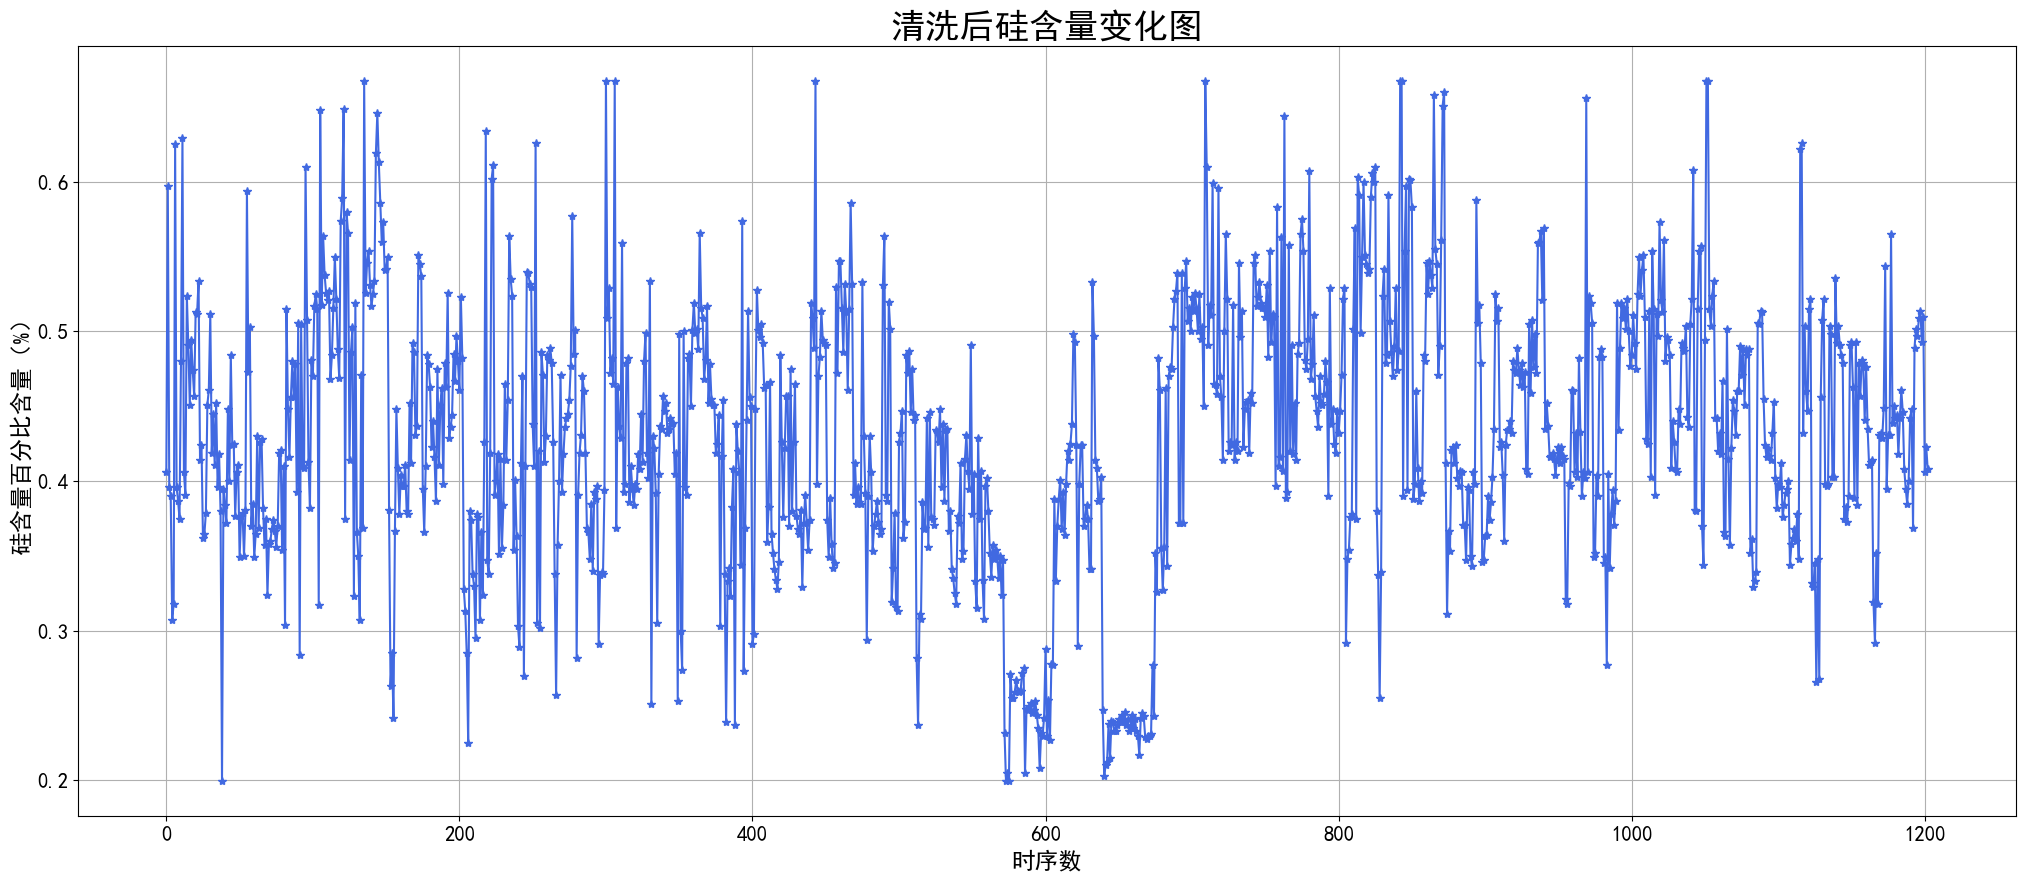

In [45]:
#将 数据绘制成折线图
plot=df['硅含量'].plot(figsize=(25,10),color='#4169E1', grid=True,fontsize=15,marker='*')
plt.ylabel('硅含量百分比含量（%）',fontsize=17)
plt.xlabel('时序数',fontsize=17)
plt.title('清洗后硅含量变化图',fontsize=25)

清洗后数理统计

In [46]:
Y6-y6

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1198    0.0
1199    0.0
1200    0.0
1201    0.0
1202    0.0
Name: 理论燃烧温度, Length: 1203, dtype: float64

去掉了硅含量超标的点

In [47]:
#绘制子图
p=plt.figure(figsize=(20,20))#设置画布大小
#子图1
ax1=p.add_subplot(4,3,1)#三行四列第一幅
sns.distplot(y1,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y1,color='b',bins=80,kde=True,hist=True)
plt.xlabel('富氧率',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图2
ax1=p.add_subplot(4,3,2)#三行四列第2幅
sns.distplot(y2,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y2,color='b',bins=80,kde=True,hist=True)
plt.xlabel('透气性指数',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图3
ax1=p.add_subplot(4,3,3)#三行四列第2幅
sns.distplot(y3,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y3,color='b',bins=80,kde=True,hist=True)
plt.xlabel('冷风流量',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图4
ax1=p.add_subplot(4,3,4)#三行四列第2幅
sns.distplot(y4,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y4,color='b',bins=80,kde=True,hist=True)
plt.xlabel('鼓风动能',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图5
ax1=p.add_subplot(4,3,5)#三行四列第2幅
sns.distplot(y5,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y5,color='b',bins=80,kde=True,hist=True)
plt.xlabel('炉腹煤气指数',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图6
ax1=p.add_subplot(4,3,6)#三行四列第2幅
sns.distplot(y6,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y6,color='b',bins=80,kde=True,hist=True)
plt.xlabel('理论燃烧温度',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图7
ax1=p.add_subplot(4,3,7)#三行四列第2幅
sns.distplot(y7,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y7,color='b',bins=80,kde=True,hist=True)
plt.xlabel('冷风压力',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图8
ax1=p.add_subplot(4,3,8)#三行四列第2幅
sns.distplot(y8,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y8,color='b',bins=80,kde=True,hist=True)
plt.xlabel('实际风速',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图9
ax1=p.add_subplot(4,3,9)#三行四列第2幅
sns.distplot(y11,color='r',bins=80,kde=True,hist=True)
sns.distplot(Y11,color='b',bins=80,kde=True,hist=True)
plt.xlabel('硅含量',fontsize=17)
plt.ylabel('概率密度(%)',fontsize=16)
#子图10
#ax1=p.add_subplot(4,3,10)#三行四列第2幅
#sns.distplot(y11,color='r',bins=80,kde=True,hist=True)
#sns.distplot(Y11,color='b',bins=80,kde=True,hist=True)
#plt.ylabel('概率密度(%)',fontsize=16)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

# 各类模型预测

In [48]:
#数据处理  随机划分训练集和测试集
#dff=dff.drop(labels=[1197,1198,1199,1200,1201,1202],axis=0,inplace=False)
x=df.drop('硅含量', axis = 1).values
y=df['硅含量'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)  #训练数据随机划分

In [49]:
#split_percent=0.3
#data_train=df.iloc[int(len(df)*split_percent):]  #前70%的数据划为训练集 
#data_test=df.iloc[:int(len(df)*split_percent)]   #剩余30%划为测试集 
#y_train=data_train['硅含量'].values
#y_test=data_test['硅含量'].values
#x_train=data_train.drop('硅含量', axis = 1).values
#x_test=data_test.drop('硅含量', axis = 1).values
##变量分离

In [50]:
#展示下训练集测试集的形状 看有没有问题
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (842, 10)
y_train (842,)
x_test (361, 10)
y_test (361,)


线性回归模型

In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
t1=time.time()
model.fit(x_train, y_train)
t2=time.time()
y_pred_linear=model.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')
#np.around(y_pred,decimals=3)  #控制输出小数点后3位
#硅含量 普通线性回归模型 预测结果

所花时间为： 459.09881591796875 ms


In [52]:
#先选取最佳alpha参数
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 100,1000])
ridgecv.fit(x_train, y_train)
ridgecv.alpha_  

0.01

 岭回归模型

In [53]:
reg=Ridge(alpha = 0.01)  #使用上面的alpha参数
t1=time.time()
reg.fit(x_train, y_train)
t2=time.time()
y_pred_reg=reg.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')
#np.around(y_pred_reg,decimals=3)  #控制输出小数点后3位
#硅含量 岭回归模型 预测结果

所花时间为： 12.125968933105469 ms


In [54]:
#y_pred_reg=reg.predict(x_test)

支持向量机模型

In [55]:
#支持向量机预测
from sklearn import svm
from sklearn.svm import SVC
#svr = svm.SVR(kernel='rbf',C=6,gamma=0.5,epsilon=0.01) 
svr = svm.SVR() 
t1=time.time()
svr.fit(x_train, y_train) 
t2=time.time()
y_pred_svm=svr.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')

所花时间为： 25.072813034057617 ms


In [56]:
#支持向量机预测
from sklearn import svm
from sklearn.svm import SVC
svr = svm.SVR(kernel='rbf',C=8,gamma=0.5,epsilon=0.8477991328424866)
t1=time.time()
svr.fit(x_train, y_train) 
t2=time.time()
y_pred_svm2=svr.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')

所花时间为： 1.0001659393310547 ms


随机森林模型

In [57]:
#随机森林预测   'max_depth': 28, 'max_features': 8, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 54
from sklearn.ensemble import RandomForestRegressor
#rf=RandomForestRegressor(max_depth=28,max_features=8,min_samples_leaf=9,min_samples_split=8,n_estimators=54)
rf=RandomForestRegressor()
t1=time.time()
rf.fit(x_train, y_train) 
t2=time.time()
y_pred_rf=rf.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')
#np.around(y_pred_tree,decimals=3) 

所花时间为： 755.2282810211182 ms


In [58]:
#随机森林预测   'max_depth': 28, 'max_features': 8, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 54
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=36,max_features=8,min_samples_leaf=9,min_samples_split=10,n_estimators=70)
t1=time.time()
rf.fit(x_train, y_train) 
t2=time.time()
y_pred_rf2=rf.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')
#np.around(y_pred_tree,decimals=3) 

所花时间为： 246.06633186340332 ms


In [59]:
#随机森林预测   'max_depth': 28, 'max_features': 8, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 54
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=28,max_features=8,min_samples_leaf=9,min_samples_split=8,n_estimators=54)
t1=time.time()
rf.fit(x_train, y_train) 
t2=time.time()
y_pred_rf3=rf.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')
#np.around(y_pred_tree,decimals=3) 

所花时间为： 193.34053993225098 ms


XGB模型

In [60]:
#XGB模型预测
xgb=XGBRegressor()
t1=time.time()
xgb.fit(x_train, y_train)
t2=time.time()
y_pred_xgb=xgb.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')

所花时间为： 171.034574508667 ms


In [61]:
ADB=AdaBoostRegressor()
t1=time.time()
ADB.fit(x_train, y_train)
t2=time.time()
y_pred_adb=ADB.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')

所花时间为： 107.0394515991211 ms


In [62]:
GBR=GradientBoostingRegressor()
t1=time.time()
GBR.fit(x_train, y_train)
t2=time.time()
y_pred_gbr=GBR.predict(x_test)
print('所花时间为：',(t2-t1)*1000,'ms')

所花时间为： 308.08353424072266 ms


In [63]:
#plt.figure(figsize=(20,10))#设置画布
#plt.plot(y_test,color='r')
#plt.plot(y_pred_linear,color='b')
#plt.plot(y_pred_reg,color='darkorange')
#plt.plot(y_pred_svm,color='g')
#plt.plot(y_pred_rf,color='darkblue')
#plt.title('硅含量变化图')
#plt.legend(['True','LinearRegression','regregression','svm','rangeforest'])
#plt.xlabel('序列数')
#plt.ylabel('硅含量')

In [64]:
#plt.figure(figsize=(12,6))#设置画布
#plt.plot(y_test,color='r',linestyle='--',marker='*')
#plt.plot(y_pred_xgb,color='#4169E1',marker='o')
#plt.legend(['真实值','岭回归预测值'],fontsize=15)
##plt.title('硅含量变化图')
#plt.xlabel('序列数',fontsize=15)
##plt.xlim(50,200)
#plt.ylabel('硅含量',fontsize=15)

分别展示

In [65]:
#plt.figure(figsize=(12,6))#设置画布
#plt.plot(y_test,color='r',linestyle='--',marker='*')
#plt.plot(y_pred_reg,color='#4169E1',marker='o')
#plt.legend(['真实值','岭回归预测值'],fontsize=15)
##plt.title('硅含量变化图')
#plt.xlabel('序列数',fontsize=15)
##plt.xlim(50,200)
#plt.ylabel('硅含量',fontsize=15)

Text(0, 0.5, '硅含量')

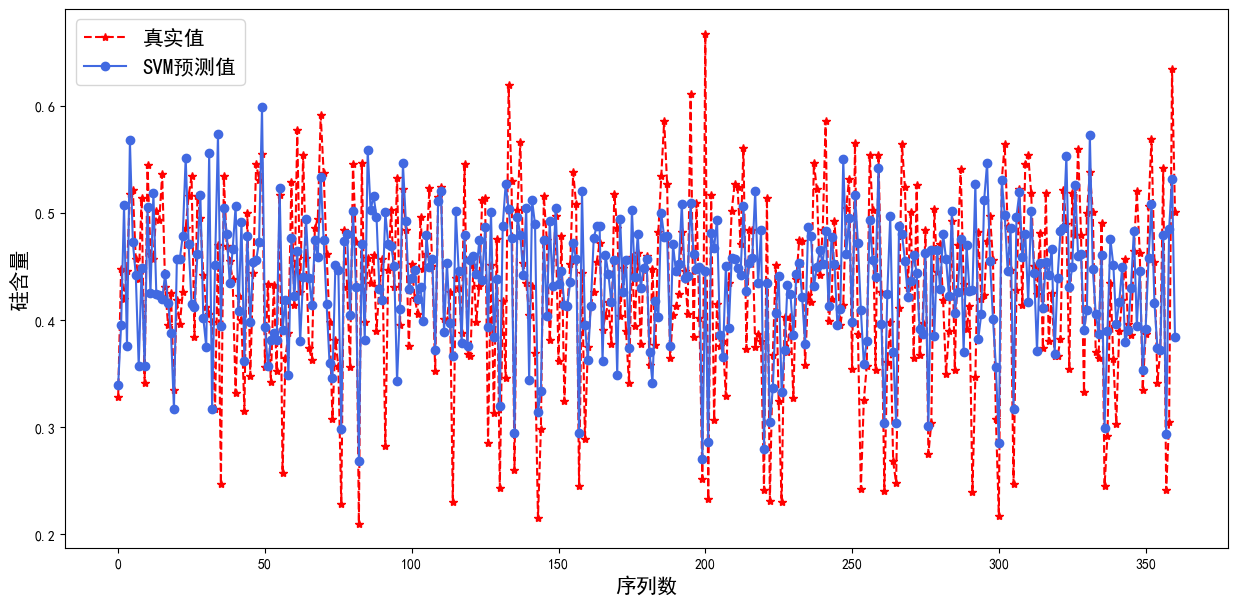

In [66]:
plt.figure(figsize=(15,7))#设置画布
plt.plot(y_test,color='r',linestyle='--',linewidth=None,marker='*')
plt.plot(y_pred_svm,color='#4169E1',marker='o')
plt.legend(['真实值','SVM预测值'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
#plt.xlim(50,150)
plt.ylabel('硅含量',fontsize=15)

Text(0, 0.5, '硅含量')

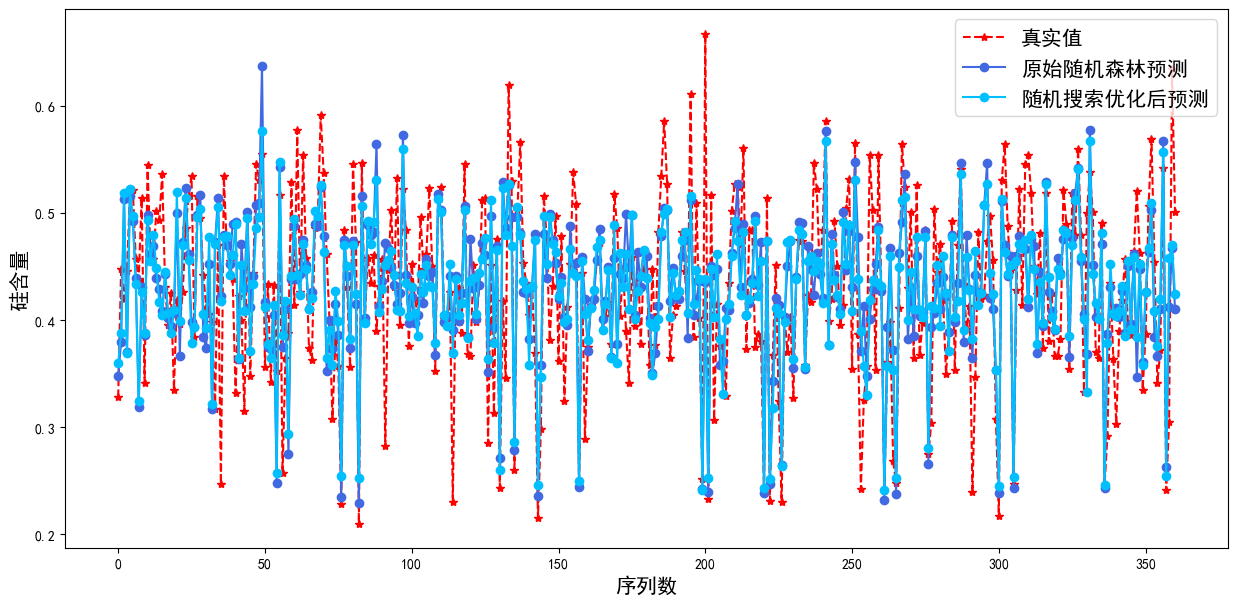

In [67]:
plt.figure(figsize=(15,7))#设置画布
plt.plot(y_test,color='r',linestyle='--',linewidth=None,marker='*')
plt.plot(y_pred_rf,color='#4169E1',marker='o')
plt.plot(y_pred_rf2,color='#00BFFF',marker='o')
plt.legend(['真实值','原始随机森林预测','随机搜索优化后预测'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
#plt.xlim(50,150)
plt.ylabel('硅含量',fontsize=15)

Text(0, 0.5, '硅含量')

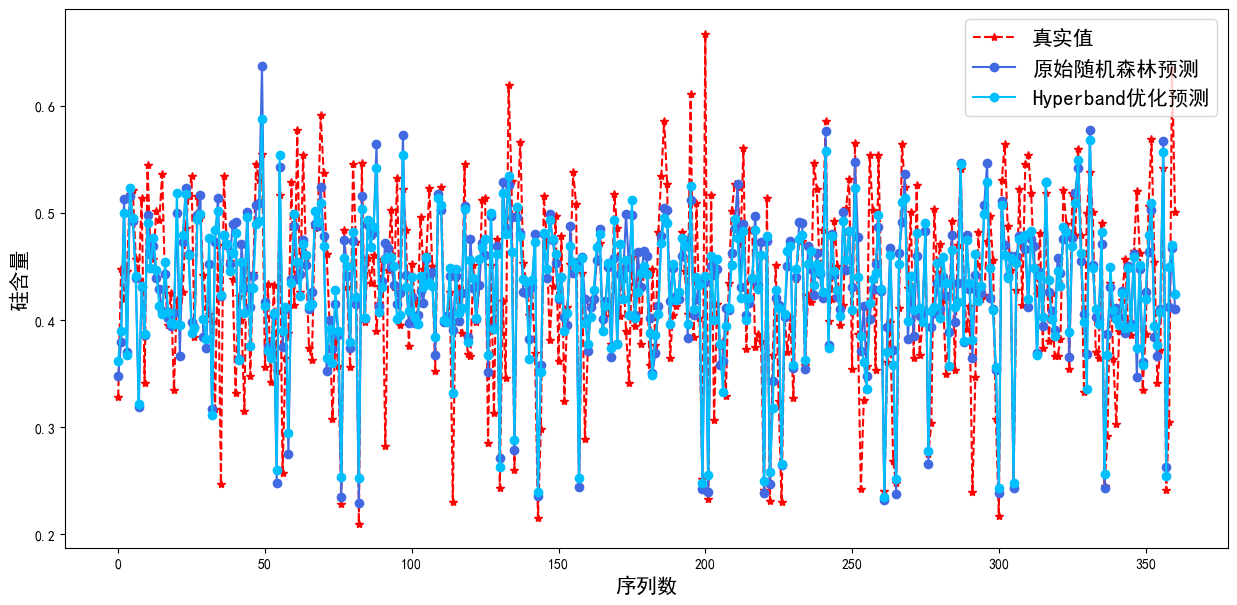

In [68]:
plt.figure(figsize=(15,7))#设置画布
plt.plot(y_test,color='r',linestyle='--',linewidth=None,marker='*')
plt.plot(y_pred_rf,color='#4169E1',marker='o')
plt.plot(y_pred_rf3,color='#00BFFF',marker='o')
plt.legend(['真实值','原始随机森林预测','Hyperband优化预测'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
#plt.xlim(50,150)
plt.ylabel('硅含量',fontsize=15)

Text(0, 0.5, '硅含量百分比')

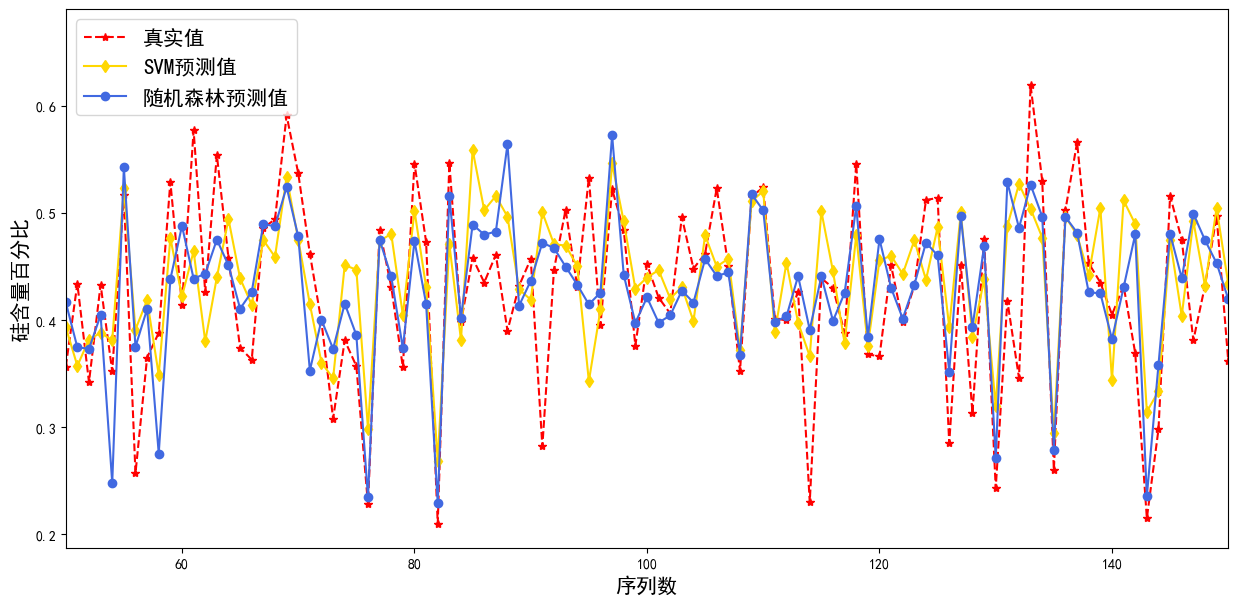

In [69]:
plt.figure(figsize=(15,7))#设置画布
plt.plot(y_test,color='r',linestyle='--',marker='*')
plt.plot(y_pred_svm,color='#FFD700',marker='d')
plt.plot(y_pred_rf,color='#4169E1',marker='o')
plt.legend(['真实值','SVM预测值','随机森林预测值'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
plt.xlim(50,150)
plt.ylabel('硅含量百分比',fontsize=15)

Text(0, 0.5, '硅含量误差%')

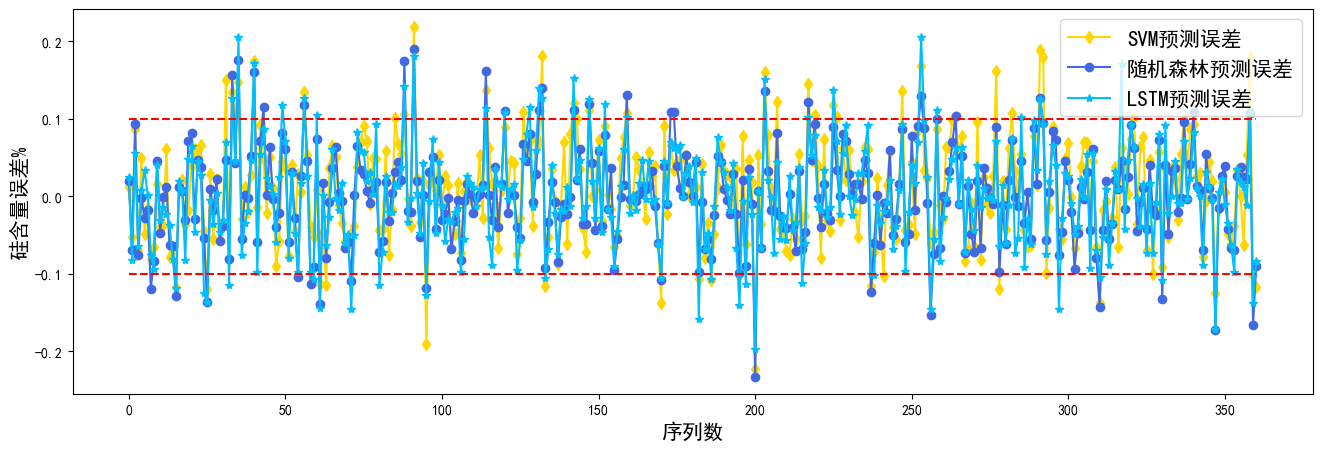

In [82]:
plt.figure(figsize=(16,5))#设置画布
#plt.plot(y_test-y_test,color='r',linewidth=5)
plt.plot(y_pred_svm-y_test,color='#FFD700',marker='d')
plt.plot(y_pred_rf-y_test,color='#4169E1',marker='o')
plt.plot(y_pred_xgb-y_test,color='#00BFFF',marker='*')
plt.plot(y_test-y_test+0.1,color='r',linewidth=1.5,linestyle='--')
plt.plot(y_test-y_test-0.1,color='r',linewidth=1.5,linestyle='--')
plt.legend(['SVM预测误差','随机森林预测误差','LSTM预测误差'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
plt.ylabel('硅含量误差%',fontsize=15)

Text(0, 0.5, '硅含量误差%')

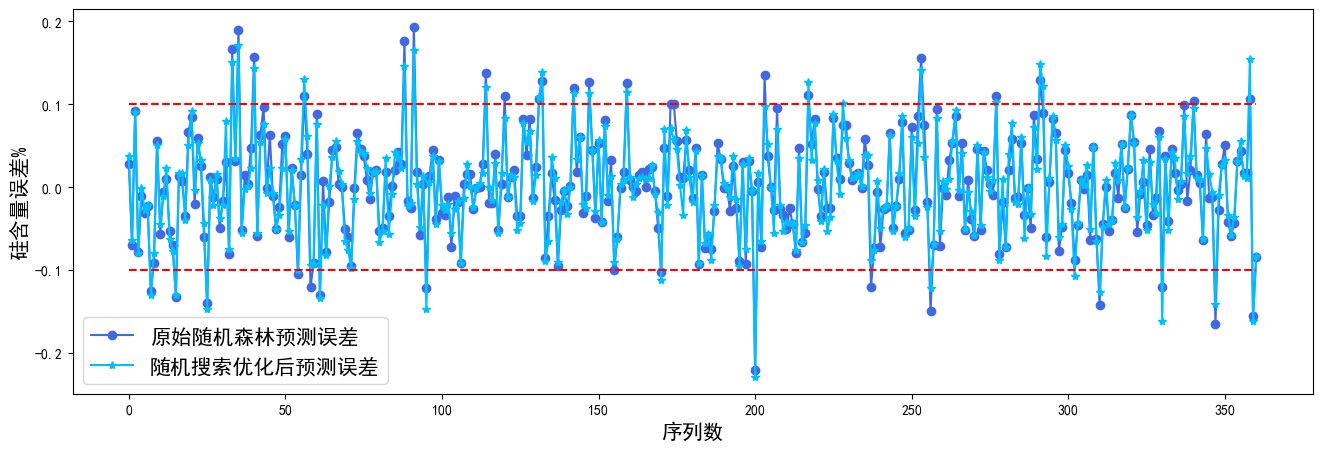

In [68]:
plt.figure(figsize=(16,5))#设置画布
#plt.plot(y_test-y_test,color='r',linewidth=5)
plt.plot(y_pred_rf-y_test,color='#4169E1',marker='o')
plt.plot(y_pred_rf2-y_test,color='#00BFFF',marker='*')
plt.plot(y_test-y_test+0.1,color='r',linewidth=1.5,linestyle='--')
plt.plot(y_test-y_test-0.1,color='r',linewidth=1.5,linestyle='--')
plt.legend(['原始随机森林预测误差','随机搜索优化后预测误差'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
plt.ylabel('硅含量误差%',fontsize=15)

Text(0, 0.5, '硅含量误差%')

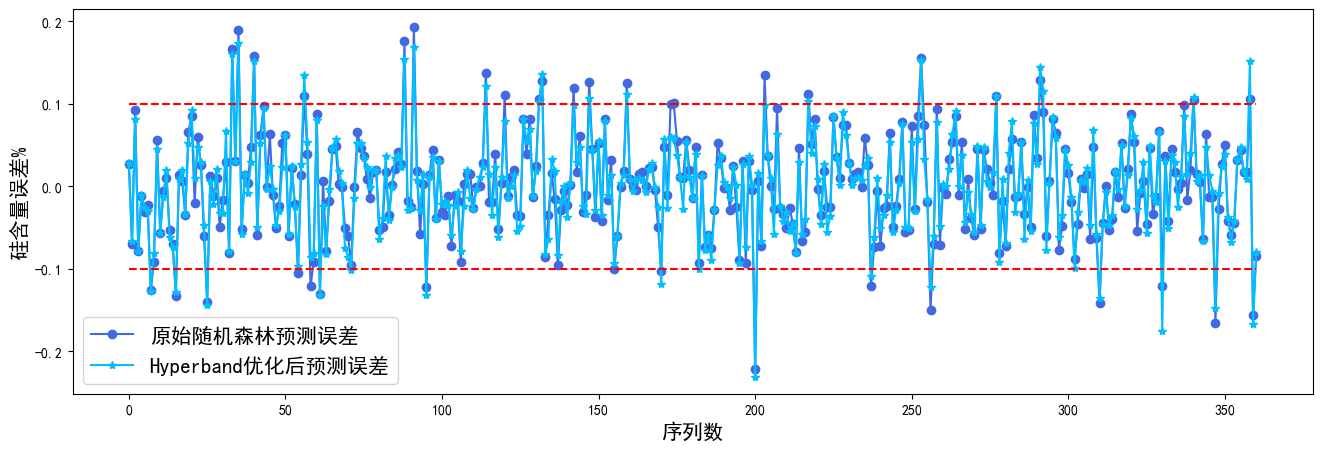

In [69]:
plt.figure(figsize=(16,5))#设置画布
#plt.plot(y_test-y_test,color='r',linewidth=5)
plt.plot(y_pred_rf-y_test,color='#4169E1',marker='o')
plt.plot(y_pred_rf3-y_test,color='#00BFFF',marker='*')
plt.plot(y_test-y_test+0.1,color='r',linewidth=1.5,linestyle='--')
plt.plot(y_test-y_test-0.1,color='r',linewidth=1.5,linestyle='--')
plt.legend(['原始随机森林预测误差','Hyperband优化后预测误差'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
plt.ylabel('硅含量误差%',fontsize=15)

In [70]:
#plt.figure(figsize=(12,6))#设置画布
#plt.plot(y_test,color='r',linestyle='--',marker='*')
#plt.plot(y_pred_gbr,color='#4169E1',marker='o')
#plt.legend(['真实值','LSTM预测值'],fontsize=15)
##plt.title('硅含量变化图')
#plt.xlabel('序列数',fontsize=15)
##plt.xlim(50,200)
#plt.ylabel('硅含量',fontsize=15)

散点图

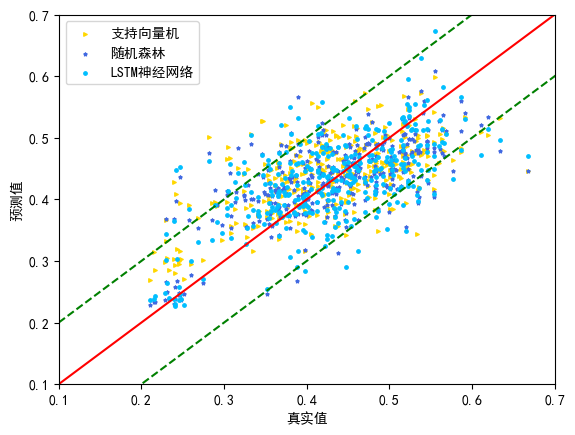

In [71]:
#plt.scatter(y_test,y_pred_linear,c='b',s=6,marker='o')
#plt.scatter(y_test,y_pred_reg,c='g',s=6,marker='D')
plt.scatter(y_test,y_pred_svm,c='#FFD700',s=6,marker='>')
#plt.scatter(y_test,y_pred_xgb,c='purple',s=6,marker='s')
plt.scatter(y_test,y_pred_rf,c='#4169E1',s=6,marker='*')
plt.scatter(y_test,y_pred_xgb,c='#00BFFF',s=6,marker='o')
plt.legend(['支持向量机','随机森林','LSTM神经网络'])

plt.xlim(0.1,0.7)
plt.ylim(0.1,0.7)
plt.xlabel("真实值")
plt.ylabel("预测值")

#绘制三条线  y=x;y=x+0.1;y=x-0.1
a= np.arange(0.1,0.9,0.1)
b= a+0.1
plt.plot(a,b,c='green',linestyle='--')
b= a
plt.plot(a,b,c='r')
b= a-0.1
plt.plot(a,b,c='green',linestyle='--')


模型评价

In [72]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

print('线性回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_linear).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_linear).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_linear).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_linear).round(8))
print('R^2:',r2_score(y_test,y_pred_linear).round(8),'\n')

print('岭回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_reg).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_reg).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_reg).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_reg).round(8))
print('R^2:',r2_score(y_test,y_pred_reg).round(8),'\n')

print('支持向量机回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_svm).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_svm).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_svm).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_svm).round(8))
print('R^2:',r2_score(y_test,y_pred_svm).round(8),'\n')


print('支持向量机回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_svm2).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_svm2).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_svm2).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_svm2).round(8))
print('R^2:',r2_score(y_test,y_pred_svm2).round(8),'\n')

print('随机森林回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_rf).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_rf).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_rf).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_rf).round(8))
print('R^2:',r2_score(y_test,y_pred_rf).round(8),'\n')

print('随机森林回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_rf3).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_rf3).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_rf3).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_rf3).round(8))
print('R^2:',r2_score(y_test,y_pred_rf3).round(8),'\n')

print('XGB回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_xgb).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_xgb).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_xgb).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_xgb).round(8))
print('R^2:',r2_score(y_test,y_pred_xgb).round(8),'\n')

线性回归模型评价
MAE: 0.04782844
MSE: 0.00391195
MedAE: 0.03603879
EVS: 0.46868621
R^2: 0.46841324 

岭回归模型评价
MAE: 0.04790505
MSE: 0.00392132
MedAE: 0.03590302
EVS: 0.46738142
R^2: 0.46714055 

支持向量机回归模型评价
MAE: 0.05565721
MSE: 0.00468528
MedAE: 0.04856818
EVS: 0.37410575
R^2: 0.36332665 

支持向量机回归模型评价
MAE: 0.0683903
MSE: 0.00738431
MedAE: 0.0585
EVS: 0.0
R^2: -0.00343911 

随机森林回归模型评价
MAE: 0.04756724
MSE: 0.00383953
MedAE: 0.03843
EVS: 0.47846496
R^2: 0.47825359 

随机森林回归模型评价
MAE: 0.04633066
MSE: 0.00361707
MedAE: 0.03552857
EVS: 0.50853426
R^2: 0.50848411 

XGB回归模型评价
MAE: 0.05198994
MSE: 0.00447883
MedAE: 0.04291878
EVS: 0.39138074
R^2: 0.39138073 



In [73]:
    i=0
    j=0
    while i<len(y_test):
        if ( abs(y_pred_svm[i]-y_test[i])<=0.1):
            j+=1
        i+=1

    v=j/len(y_test)
    print('支持向量机命中率为：',v)

支持向量机命中率为： 0.8642659279778393


In [74]:
    i=0
    j=0
    while i<len(y_test):
        if ( abs(y_pred_linear[i]-y_test[i])<=0.1):
            j+=1
        i+=1

    v=j/len(y_test)
    print('线性回归命中率为：',v)

线性回归命中率为： 0.8947368421052632


In [75]:
    i=0
    j=0
    while i<len(y_test):
        if ( abs(y_pred_reg[i]-y_test[i])<=0.1):
            j+=1
        i+=1

    v=j/len(y_test)
    print('岭回归命中率为：',v)

岭回归命中率为： 0.8919667590027701


In [76]:
    i=0
    j=0
    while i<len(y_test):
        if ( abs(y_pred_rf2[i]-y_test[i])<=0.1):
            j+=1
        i+=1

    v=j/len(y_test)
    print('随机森林回归命中率为：',v)

随机森林回归命中率为： 0.9113573407202216


In [77]:
    i=0
    j=0
    while i<len(y_test):
        if ( abs(y_pred_xgb[i]-y_test[i])<=0.1):
            j+=1
        i+=1

    v=j/len(y_test)
    print('XGB回归命中率为：',v)

XGB回归命中率为： 0.8587257617728532


In [78]:
    i=0
    j=0
    while i<len(y_test):
        if ( abs(y_pred_gbr[i]-y_test[i])<=0.1):
            j+=1
        i+=1

    v=j/len(y_test)
    print('gbr回归命中率为：',v)

gbr回归命中率为： 0.9058171745152355


LSTM模型搭建

In [75]:
feanum=11#一共有多少特征
window=5#时间窗设置
#df

In [76]:
#这一部分在处理数据 将原始数据改造为LSTM网络的输入
seq_len=window
amount_of_features = len(df.columns)#有几列
data = df.values #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环数据长度-时间窗长度次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum

x=result[:, :-1]
y=result[:, -1][:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=166)

X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [77]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (837, 5, 11)
y_train (837,)
X_test (360, 5, 11)
y_test (360,)


In [78]:
#建立、训练模型过程
d = 0.3
model = Sequential()#建立层次模型
model.add(LSTM(10, input_shape=(window, feanum),activation='tanh',return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层

#model.add(LSTM(10,activation='tanh',return_sequences=True))#建立LSTM层
#model.add(Dropout(d))#建立的遗忘层

model.add(LSTM(10,activation='tanh'))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层

model.add(Dense(10,activation='tanh'))   #建立全连接层  
model.add(Dropout(d))#建立的遗忘层

model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mape'])

t1=time.time()
history=model.fit(X_train, y_train, epochs=1000, batch_size = 256,validation_data=(X_test,y_test)) #训练模型nb_epoch次
t2=time.time()

Epoch 1/1000
4/4 [==============================] - 3s 220ms/step - loss: 0.2724 - mape: 115.5892 - val_loss: 0.1927 - val_mape: 99.6821
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1995 - mape: 95.8998 - val_loss: 0.1190 - val_mape: 75.1154
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1221 - mape: 71.4875 - val_loss: 0.0636 - val_mape: 50.2042
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0772 - mape: 54.2004 - val_loss: 0.0292 - val_mape: 31.9836
Epoch 5/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0642 - mape: 49.8220 - val_loss: 0.0157 - val_mape: 24.9395
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0568 - mape: 46.5699 - val_loss: 0.0144 - val_mape: 25.7740
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0594 - mape: 49.5438 - val_loss: 0.0141 - val_mape: 25.6788
Epoch 8/1000
4/4 [==============================] - 0

4/4 [==============================] - 0s 14ms/step - loss: 0.0107 - mape: 20.3511 - val_loss: 0.0063 - val_mape: 16.2005
Epoch 122/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0102 - mape: 19.8716 - val_loss: 0.0063 - val_mape: 16.1953
Epoch 123/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0118 - mape: 20.9944 - val_loss: 0.0062 - val_mape: 16.2141
Epoch 124/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0110 - mape: 20.9420 - val_loss: 0.0062 - val_mape: 16.2185
Epoch 125/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0108 - mape: 20.6092 - val_loss: 0.0062 - val_mape: 16.2334
Epoch 126/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0109 - mape: 20.5970 - val_loss: 0.0062 - val_mape: 16.2003
Epoch 127/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0111 - mape: 20.5086 - val_loss: 0.0062 - val_mape: 16.1035
Epoch 128/1000
4/4 [==============================] - 0s

Epoch 181/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0098 - mape: 19.2594 - val_loss: 0.0058 - val_mape: 15.4458
Epoch 182/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0091 - mape: 18.4548 - val_loss: 0.0058 - val_mape: 15.4732
Epoch 183/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0092 - mape: 19.1123 - val_loss: 0.0058 - val_mape: 15.4710
Epoch 184/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0101 - mape: 19.5189 - val_loss: 0.0058 - val_mape: 15.4688
Epoch 185/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0094 - mape: 19.1234 - val_loss: 0.0058 - val_mape: 15.4600
Epoch 186/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0095 - mape: 19.3600 - val_loss: 0.0058 - val_mape: 15.5256
Epoch 187/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0095 - mape: 19.5838 - val_loss: 0.0057 - val_mape: 15.6089
Epoch 188/1000
4/4 [=====================

Epoch 241/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0083 - mape: 17.8469 - val_loss: 0.0056 - val_mape: 15.0737
Epoch 242/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0086 - mape: 18.1053 - val_loss: 0.0056 - val_mape: 14.9728
Epoch 243/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0087 - mape: 18.1251 - val_loss: 0.0056 - val_mape: 14.9478
Epoch 244/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0089 - mape: 18.2982 - val_loss: 0.0056 - val_mape: 15.0182
Epoch 245/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0081 - mape: 17.6750 - val_loss: 0.0055 - val_mape: 15.1356
Epoch 246/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0080 - mape: 17.2938 - val_loss: 0.0055 - val_mape: 15.1270
Epoch 247/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0084 - mape: 17.8654 - val_loss: 0.0055 - val_mape: 14.9643
Epoch 248/1000
4/4 [=====================

Epoch 301/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0078 - mape: 17.2170 - val_loss: 0.0053 - val_mape: 14.5061
Epoch 302/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0070 - mape: 16.2005 - val_loss: 0.0053 - val_mape: 14.4832
Epoch 303/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0071 - mape: 16.5151 - val_loss: 0.0053 - val_mape: 14.3112
Epoch 304/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0073 - mape: 16.5791 - val_loss: 0.0053 - val_mape: 14.3781
Epoch 305/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0069 - mape: 16.3363 - val_loss: 0.0053 - val_mape: 14.5618
Epoch 306/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0076 - mape: 17.1414 - val_loss: 0.0053 - val_mape: 14.5150
Epoch 307/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0071 - mape: 16.5287 - val_loss: 0.0053 - val_mape: 14.3688
Epoch 308/1000
4/4 [=====================

Epoch 361/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0065 - mape: 15.6998 - val_loss: 0.0051 - val_mape: 14.1114
Epoch 362/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0069 - mape: 16.0037 - val_loss: 0.0051 - val_mape: 14.0032
Epoch 363/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0069 - mape: 16.1543 - val_loss: 0.0051 - val_mape: 14.0332
Epoch 364/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0070 - mape: 16.4506 - val_loss: 0.0051 - val_mape: 13.8821
Epoch 365/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0069 - mape: 15.7680 - val_loss: 0.0051 - val_mape: 13.8681
Epoch 366/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0066 - mape: 15.5310 - val_loss: 0.0051 - val_mape: 14.3106
Epoch 367/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0068 - mape: 16.1133 - val_loss: 0.0051 - val_mape: 14.4520
Epoch 368/1000
4/4 [=====================

Epoch 421/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0063 - mape: 15.3287 - val_loss: 0.0049 - val_mape: 13.7654
Epoch 422/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0065 - mape: 15.8214 - val_loss: 0.0049 - val_mape: 13.6400
Epoch 423/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0062 - mape: 15.1645 - val_loss: 0.0049 - val_mape: 13.5781
Epoch 424/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0058 - mape: 14.7933 - val_loss: 0.0049 - val_mape: 13.6080
Epoch 425/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0063 - mape: 15.4303 - val_loss: 0.0049 - val_mape: 13.7548
Epoch 426/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0060 - mape: 14.8866 - val_loss: 0.0049 - val_mape: 13.6644
Epoch 427/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0058 - mape: 14.9535 - val_loss: 0.0049 - val_mape: 13.4286
Epoch 428/1000
4/4 [=====================

Epoch 481/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0058 - mape: 14.7552 - val_loss: 0.0048 - val_mape: 13.2298
Epoch 482/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0058 - mape: 14.4553 - val_loss: 0.0048 - val_mape: 13.2527
Epoch 483/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0059 - mape: 14.8330 - val_loss: 0.0048 - val_mape: 13.4130
Epoch 484/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0057 - mape: 14.6197 - val_loss: 0.0048 - val_mape: 13.6377
Epoch 485/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0058 - mape: 15.0424 - val_loss: 0.0048 - val_mape: 13.7392
Epoch 486/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0058 - mape: 14.8541 - val_loss: 0.0047 - val_mape: 13.3911
Epoch 487/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0059 - mape: 14.7693 - val_loss: 0.0047 - val_mape: 13.3254
Epoch 488/1000
4/4 [=====================

Epoch 541/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0055 - mape: 14.3496 - val_loss: 0.0046 - val_mape: 13.0111
Epoch 542/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0055 - mape: 14.2036 - val_loss: 0.0046 - val_mape: 13.0700
Epoch 543/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0055 - mape: 14.5004 - val_loss: 0.0046 - val_mape: 13.1563
Epoch 544/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0056 - mape: 14.4344 - val_loss: 0.0046 - val_mape: 13.1483
Epoch 545/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0053 - mape: 14.0548 - val_loss: 0.0046 - val_mape: 13.1360
Epoch 546/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0056 - mape: 14.3210 - val_loss: 0.0045 - val_mape: 12.9108
Epoch 547/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0054 - mape: 14.2203 - val_loss: 0.0045 - val_mape: 12.9135
Epoch 548/1000
4/4 [=====================

Epoch 601/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0053 - mape: 13.8240 - val_loss: 0.0045 - val_mape: 12.6079
Epoch 602/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0054 - mape: 14.1490 - val_loss: 0.0045 - val_mape: 13.1206
Epoch 603/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mape: 14.1553 - val_loss: 0.0045 - val_mape: 13.2423
Epoch 604/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0054 - mape: 14.2656 - val_loss: 0.0044 - val_mape: 12.9021
Epoch 605/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mape: 14.0468 - val_loss: 0.0044 - val_mape: 12.6857
Epoch 606/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0053 - mape: 13.9072 - val_loss: 0.0044 - val_mape: 12.7625
Epoch 607/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0053 - mape: 14.3133 - val_loss: 0.0045 - val_mape: 13.1402
Epoch 608/1000
4/4 [=====================

Epoch 661/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mape: 13.5021 - val_loss: 0.0043 - val_mape: 12.1298
Epoch 662/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.4221 - val_loss: 0.0043 - val_mape: 12.7327
Epoch 663/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0052 - mape: 14.2829 - val_loss: 0.0044 - val_mape: 13.1771
Epoch 664/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 14.0094 - val_loss: 0.0043 - val_mape: 12.5857
Epoch 665/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mape: 13.8033 - val_loss: 0.0043 - val_mape: 12.2067
Epoch 666/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0054 - mape: 14.3051 - val_loss: 0.0044 - val_mape: 12.9240
Epoch 667/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0053 - mape: 14.3194 - val_loss: 0.0044 - val_mape: 12.8157
Epoch 668/1000
4/4 [=====================

Epoch 721/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0051 - mape: 14.0012 - val_loss: 0.0043 - val_mape: 12.8424
Epoch 722/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0053 - mape: 14.3593 - val_loss: 0.0043 - val_mape: 12.4551
Epoch 723/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0051 - mape: 13.8819 - val_loss: 0.0043 - val_mape: 12.4268
Epoch 724/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0051 - mape: 13.7860 - val_loss: 0.0043 - val_mape: 12.4134
Epoch 725/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0049 - mape: 13.5029 - val_loss: 0.0043 - val_mape: 12.7765
Epoch 726/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 13.7498 - val_loss: 0.0043 - val_mape: 12.5847
Epoch 727/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.7172 - val_loss: 0.0043 - val_mape: 12.1026
Epoch 728/1000
4/4 [=====================

Epoch 781/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0049 - mape: 13.3167 - val_loss: 0.0043 - val_mape: 12.7812
Epoch 782/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 13.8660 - val_loss: 0.0043 - val_mape: 12.6531
Epoch 783/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 13.7488 - val_loss: 0.0042 - val_mape: 12.3261
Epoch 784/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mape: 13.9620 - val_loss: 0.0042 - val_mape: 12.0513
Epoch 785/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.7639 - val_loss: 0.0042 - val_mape: 12.3222
Epoch 786/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.8897 - val_loss: 0.0043 - val_mape: 12.7027
Epoch 787/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.8426 - val_loss: 0.0042 - val_mape: 12.4465
Epoch 788/1000
4/4 [=====================

Epoch 841/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.5234 - val_loss: 0.0042 - val_mape: 12.4074
Epoch 842/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mape: 14.0634 - val_loss: 0.0043 - val_mape: 13.1487
Epoch 843/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mape: 14.1466 - val_loss: 0.0042 - val_mape: 12.1115
Epoch 844/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0051 - mape: 13.4605 - val_loss: 0.0042 - val_mape: 12.1085
Epoch 845/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 13.5749 - val_loss: 0.0044 - val_mape: 13.2619
Epoch 846/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 14.2268 - val_loss: 0.0043 - val_mape: 12.8613
Epoch 847/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 13.7700 - val_loss: 0.0042 - val_mape: 12.0446
Epoch 848/1000
4/4 [=====================

Epoch 901/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.7832 - val_loss: 0.0042 - val_mape: 12.3192
Epoch 902/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0048 - mape: 13.2063 - val_loss: 0.0042 - val_mape: 12.6426
Epoch 903/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0048 - mape: 13.5582 - val_loss: 0.0042 - val_mape: 12.2823
Epoch 904/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 13.4684 - val_loss: 0.0042 - val_mape: 12.2026
Epoch 905/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 13.4274 - val_loss: 0.0042 - val_mape: 12.4679
Epoch 906/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 13.3717 - val_loss: 0.0042 - val_mape: 12.3672
Epoch 907/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 13.4179 - val_loss: 0.0041 - val_mape: 11.9618
Epoch 908/1000
4/4 [=====================

Epoch 961/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 13.8550 - val_loss: 0.0042 - val_mape: 12.3234
Epoch 962/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 13.7805 - val_loss: 0.0041 - val_mape: 12.1808
Epoch 963/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 13.4922 - val_loss: 0.0041 - val_mape: 12.1432
Epoch 964/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 13.4996 - val_loss: 0.0042 - val_mape: 12.4259
Epoch 965/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0050 - mape: 13.8151 - val_loss: 0.0041 - val_mape: 12.1574
Epoch 966/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 13.2501 - val_loss: 0.0041 - val_mape: 11.8772
Epoch 967/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0047 - mape: 13.0994 - val_loss: 0.0041 - val_mape: 12.1025
Epoch 968/1000
4/4 [=====================

In [79]:
t2-t1  #LSTM模型建立的时间

53.60475826263428

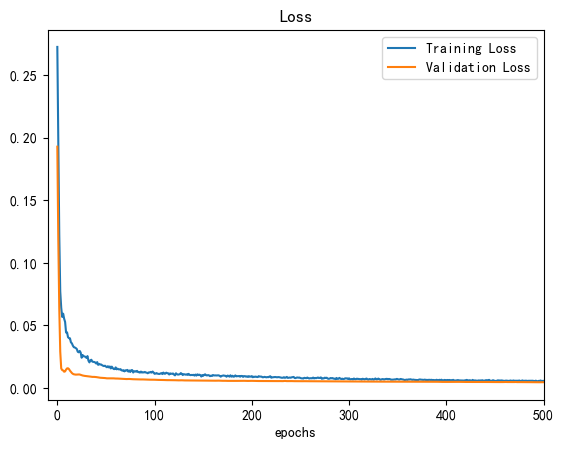

In [80]:
#loss曲线
loss =  history.history['loss']
val_loss = history.history['val_loss']
mape=history.history['mape']
val_mape=history.history['val_mape']
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.xlim(-10,500)
plt.legend()
plt.title('Loss')
plt.xlabel('epochs')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

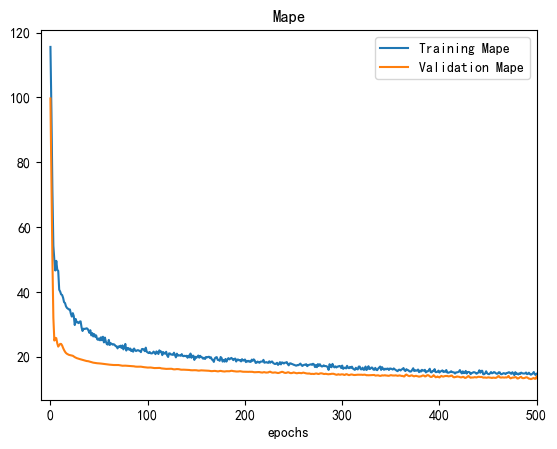

In [81]:
plt.plot(mape,label='Training Mape')
plt.plot(val_mape,label='Validation Mape')
plt.legend()
plt.xlim(-10,500)
plt.title('Mape')
plt.xlabel('epochs')
plt.show

In [82]:
#总结模型
LSTMmodel=model  #模型复制
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 10)             880       
                                                                 
 dropout (Dropout)           (None, 5, 10)             0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [83]:
y_pred_lstm_train=model.predict(X_train)[:,0]

27/27 [==============================] - 1s 2ms/step


In [84]:
y_pred_lstm_train.shape

(837,)

In [85]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_pred_lstm_train)],axis=1)
draw.iloc[0:837,0].plot(figsize=(12,6))
draw.iloc[0:837,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Train Data')

对测试集重新划分和基础学习模型一样

In [86]:
#x=df.drop('硅含量', axis = 1).values
#y=df['硅含量'].values
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
##制作LSTM的x_test
#new_test= []
#for index in range(len(x_test) - sequence_length):#循环数据长度-时间窗长度次
#    new_test.append(data[index: index + sequence_length])#第i行到i+5
#new_test = np.array(new_test)#得到样本，样本形式为 window*feanum

In [87]:
#new_test.shape

In [88]:
#在测试集上的预测
y_pred_lstm_test=model.predict(X_test)[:,0]

12/12 [==============================] - 0s 2ms/step


In [89]:
y_pred_lstm_test.shape

(360,)

In [90]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred_lstm_test)],axis=1);
draw.iloc[0:359,0].plot(figsize=(12,6))
draw.iloc[0:359,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

Text(0.5, 1.0, 'Test Data')

In [91]:
plt.figure(figsize=(12,6))#设置画布
plt.plot(y_test,color='r',linestyle='--',marker='*')
plt.plot(y_pred_lstm_test,color='#4169E1',marker='o')
plt.legend(['真实值','LSTM预测值'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
#plt.xlim(50,200)
plt.ylabel('硅含量',fontsize=15)

Text(0, 0.5, '硅含量')

In [92]:
    i=0
    j=0
    while i<len(y_test):
        if ( abs(y_pred_lstm_test[i]-y_test[i])<=0.1):
            j+=1
        i+=1

    v=j/len(y_test)
    print('测试集LSTM预测命中率：',v)

测试集LSTM预测命中率： 0.8833333333333333


In [93]:
print('LSTM回归模型评价')
print('MAE:',mean_absolute_error(y_test,y_pred_lstm_test).round(8))
print('MSE:',mean_squared_error(y_test,y_pred_lstm_test).round(8))
print('MedAE:',median_absolute_error(y_test,y_pred_lstm_test).round(8))
print('EVS:',explained_variance_score(y_test,y_pred_lstm_test).round(8))
print('R^2:',r2_score(y_test,y_pred_lstm_test).round(8),'\n')

LSTM回归模型评价
MAE: 0.04887106
MSE: 0.0041288
MedAE: 0.04012927
EVS: 0.49130172
R^2: 0.49003775 



# Stacking模型融合
对上述模型进行融合

In [89]:
#数据处理
x=df.drop('硅含量', axis = 1).values
y=df['硅含量'].values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)
kf=KFold(n_splits=5)
n_train=xtrain.shape[0]         #842个训练样本  354
n_test=xtest.shape[0]           #361个测试样本  152
print(n_train)
print(n_test)

842
361


In [90]:
#from sklearn.tree import DecisionTreeRegressor
t1=time.time()
models=[Ridge(alpha = 0.01),SVR(),RandomForestRegressor(max_depth=28,max_features=8,min_samples_leaf=9,min_samples_split=8,n_estimators=54)]

def get_oof(model,x_train,y_train,x_test):
    oof_train=np.zeros((n_train,))     #构造一个0矩阵   842行1列
    oof_test=np.zeros((n_test,))       #构造一个0矩阵   361行一列
    oof_test_skf=np.zeros((5,n_test))  #5*361
    for i,(train_index,test_index) in enumerate(kf.split(x_train)):
        kf_x_train=x_train[train_index]              #每一折训练842*0.8个样本的X
        kf_y_train=y_train[train_index]              #每一折训练842*0.8个样本的Y
        kf_x_test=x_train[test_index]                #每一折的842*0.2测试样本的X
        model=model.fit(kf_x_train,kf_y_train)
        oof_train[test_index]=model.predict(kf_x_test)        #每次产生842*0.2个预测值，最终5折后成为堆叠成为842个训练样本的测试值
        oof_test_skf[i,:]=model.predict(x_test)               #每次生成1*361的测试集预测值，填oof_test_skf[i，：]，五次以后填满形成5*361的预测值矩阵
    oof_test[:]=oof_test_skf.mean(axis=0)            #把测试集的五次预测结果，求平均，形成一次预测结果
    return oof_train,oof_test     #第一个返回值为第二层模型训练集的特征，1*842；第二个返回值为第一层模型对测试集数据的预测1*361，要作为第二层模型的训练集Xtest
number_models=len(models)
xtrain_new=np.zeros((n_train,number_models))
xtest_new=np.zeros((n_test,number_models))
for i,regressor in enumerate(models):
    xtrain_new[:,i],xtest_new[:,i]=get_oof(regressor,xtrain,ytrain,xtest)

In [91]:
reg=LinearRegression()
reg=reg.fit(xtrain_new,ytrain)
y_pred=reg.predict(xtest_new)
t2=time.time()
score=reg.score(xtest_new,ytest)
score

0.5151917608148927

In [92]:
print(t2-t1)

3.3340096473693848


In [93]:
plt.figure(figsize=(20,10))#设置画布
plt.plot(y_pred,color='r')
plt.plot(ytest,color='b')
plt.title('硅含量变化图')
plt.xlabel('序列数')

Text(0.5, 0, '序列数')

In [94]:
plt.figure(figsize=(12,6))#设置画布
plt.plot(y_test,color='r',linestyle='--',marker='*')
plt.plot(y_pred,color='#4169E1',marker='o')
plt.legend(['真实值','Stacking预测值'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
#plt.xlim(50,200)
plt.ylabel('硅含量%',fontsize=15)

Text(0, 0.5, '硅含量%')

Text(0, 0.5, '硅含量误差%')

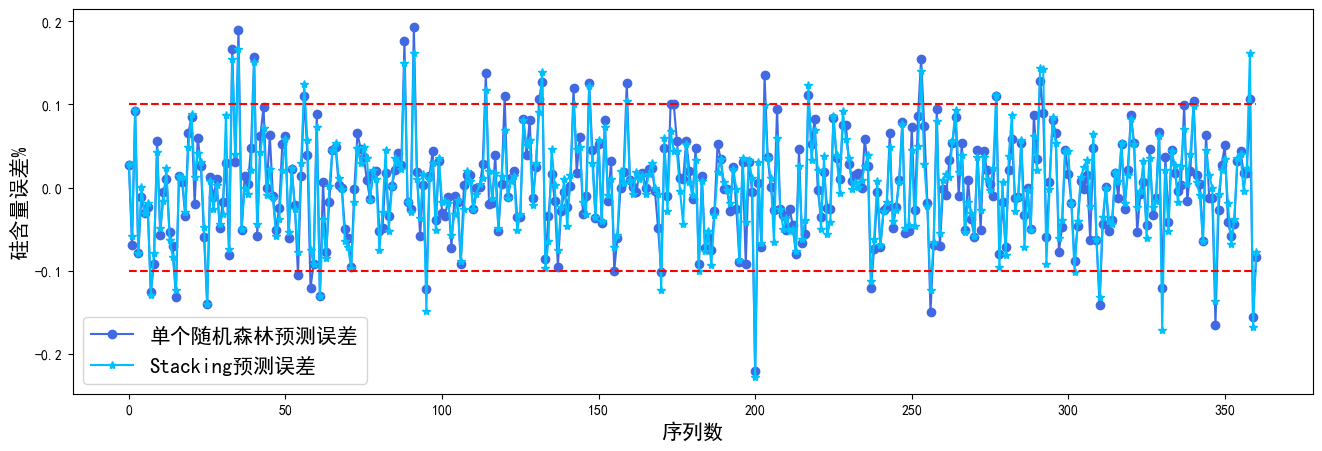

In [95]:
plt.figure(figsize=(16,5))#设置画布
#plt.plot(y_test-y_test,color='r',linewidth=5)
plt.plot(y_pred_rf-y_test,color='#4169E1',marker='o')
plt.plot(y_pred-y_test,color='#00BFFF',marker='*')
plt.plot(y_test-y_test+0.1,color='r',linewidth=1.5,linestyle='--')
plt.plot(y_test-y_test-0.1,color='r',linewidth=1.5,linestyle='--')
plt.legend(['单个随机森林预测误差','Stacking预测误差'],fontsize=15)
#plt.title('硅含量变化图')
plt.xlabel('序列数',fontsize=15)
plt.ylabel('硅含量误差%',fontsize=15)

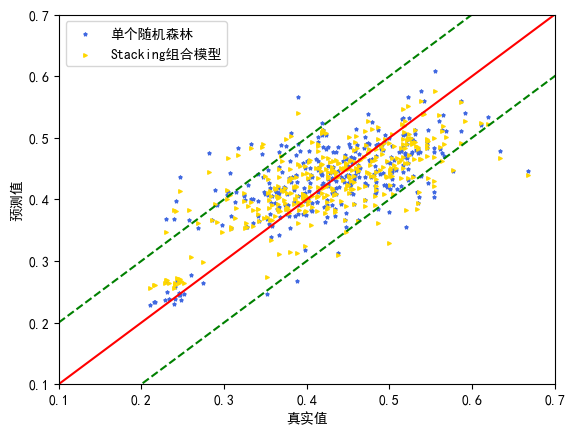

In [96]:
#plt.scatter(y_test,y_pred_linear,c='b',s=6,marker='o')
#plt.scatter(y_test,y_pred_reg,c='g',s=6,marker='D')
#plt.scatter(y_test,y_pred_xgb,c='purple',s=6,marker='s')
plt.scatter(y_test,y_pred_rf,c='#4169E1',s=6,marker='*')
plt.scatter(y_test,y_pred,c='#FFD700',s=6,marker='>')
plt.legend(['单个随机森林','Stacking组合模型'])

plt.xlim(0.1,0.7)
plt.ylim(0.1,0.7)
plt.xlabel("真实值")
plt.ylabel("预测值")

#绘制三条线  y=x;y=x+0.1;y=x-0.1
a= np.arange(0.1,0.9,0.1)
b= a+0.1
plt.plot(a,b,c='green',linestyle='--')
b= a
plt.plot(a,b,c='r')
b= a-0.1
plt.plot(a,b,c='green',linestyle='--')


In [97]:
    i=0
    j=0
    while i<len(ytest):
        if ( abs(y_pred[i]-ytest[i])<=0.1):
            j+=1
        i+=1

    v=j/len(ytest)
    print('回归命中率为：',v)

回归命中率为： 0.9113573407202216


In [98]:
print('Stacking回归模型评价')
print('MAE:',mean_absolute_error(ytest,y_pred).round(8))
print('MSE:',mean_squared_error(ytest,y_pred).round(8))
print('MedAE:',median_absolute_error(ytest,y_pred).round(8))
print('EVS:',explained_variance_score(ytest,y_pred).round(8))
print('R^2:',r2_score(ytest,y_pred).round(8),'\n')

Stacking回归模型评价
MAE: 0.04611506
MSE: 0.00356771
MedAE: 0.03710696
EVS: 0.51519384
R^2: 0.51519176 



# 超参数调优

1.随机搜索法

In [39]:
#变量分离
y=df['硅含量'].values
X=df.drop('硅含量', axis = 1).values

In [166]:
from sklearn.model_selection import cross_val_score
#Random Forest
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error') # 3-fold cross-validation
print("MSE:"+ str(-scores.mean()))

MSE:0.009079876086437247


In [80]:
from sklearn.model_selection import cross_val_score
#Random Forest
clf = SVR()
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error') # 3-fold cross-validation
print("MSE:"+ str(-scores.mean()))

MSE:0.009520257917881754


原始MSE

RandomizedSearchCV 中的常用参数如下:
estimator: 需要调参的模型对象。
param_distributions: 参数搜索范围，可以是字典或列表。
n_iter: 随机搜索的次数。
cv: 交叉验证的折数。
scoring: 评价函数，默认为None。
n_jobs: 并行数，默认为1，-1代表全部使用。
verbose: 日志信息详细程度，默认为0。
return_train_score: 是否返回训练集的评分，默认为False。
random_state: 随机种子，默认为None。

In [41]:
#Random Forest
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
t1=time.time()
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,13),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestRegressor()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
t2=time.time()
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))
print('随机搜索花费时间为：',t2-t1,'s')

{'max_depth': 22, 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 14}
MSE:0.006647692519884227
随机搜索花费时间为： 6.967531204223633 s


Successive halving+randsearch↓

In [45]:
from sklearn import model_selection
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
#Random Forest
# Define the hyperparameter configuration space
t1=time.time()
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,20),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    #"criterion":['squared_error', 'friedman_mse', 'poisson', 'absolute_error']
}  #5种参数90*12*45*9*10
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestRegressor()
Random = HalvingRandomSearchCV(clf, param_distributions=rf_params,n_candidates=81, factor=3,resource='n_samples',min_resources=3,max_resources='auto',cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
t2=time.time()
print(Random.best_params_)
print(Random.n_resources_)
print(Random.n_candidates_)
print(Random.max_resources_)
print(Random.n_iterations_)
print("MSE:"+ str(-Random.best_score_))
print('随机减半花费时间为：',t2-t1,'s')
laq = pd.DataFrame(Random.cv_results_)
#print(Random.cv_results_)

{'max_depth': 48, 'max_features': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 57}
[3, 9, 27, 81, 243]
[81, 27, 9, 3, 1]
1203
5
MSE:0.007278293326141932
随机减半花费时间为： 18.149102926254272 s


In [43]:
#laq

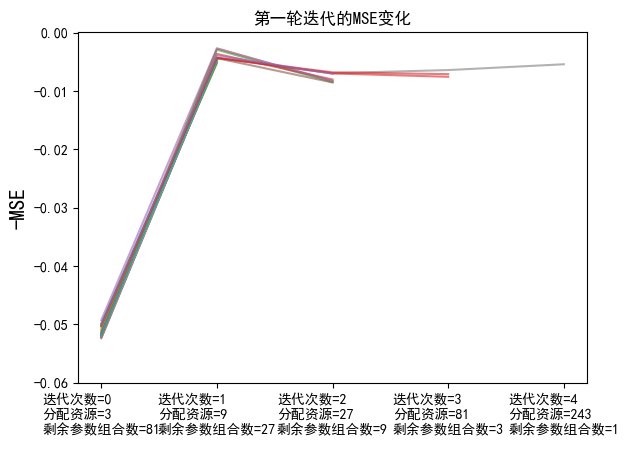

In [44]:
results = pd.DataFrame(Random.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"迭代次数={i}\n分配资源={Random.n_resources_[i]}\n剩余参数组合数={Random.n_candidates_[i]}"
    for i in range(Random.n_iterations_)
]

ax.set_xticks(range(Random.n_iterations_))
ax.set_xticklabels(labels,multialignment="left")
ax.set_title("第一轮迭代的MSE变化")
ax.set_ylabel("-MSE", fontsize=15)
ax.set_xlabel(" ", fontsize=15)
plt.tight_layout()
plt.show()

In [70]:
results

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0     0            3       0.018339  4.743492e-04         0.001667   
1     0            3       0.055677  4.658907e-04         0.004003   
2     0            3       0.056017  6.800388e-06         0.003325   
3     0            3       0.021679  4.727627e-04         0.001665   
4     0            3       0.073017  1.123916e-07         0.004995   
5     1            6       0.073350  4.714266e-04         0.004660   
6     1            6       0.057350  4.687554e-04         0.003662   
7     1            6       0.021682  4.660582e-04         0.001665   
8     2           12       0.057011  2.418379e-06         0.003660   
9     2           12       0.073354  4.685328e-04         0.004664   

   std_score_time param_max_depth param_max_features param_min_samples_leaf  \
0        0.000472              42                  1                      2   
1        0.000007              28                 13                      2   
2        0.000464              10                  2                      5   
3        0.000470              20                 18                      8   
4        0.000005              42                  2                      4   
5        0.000475              42                  2                      4   
6        0.000476              28                 13                      2   
7        0.000474              20                 18                      8   
8        0.000479              28                 13                      2   
9        0.000468              42                  2                      4   

  param_min_samples_split  ... split2_test_score mean_test_score  \
0                      10  ...         -0.001920       -0.007127   
1                       7  ...         -0.001788       -0.007053   
2                       4  ...         -0.002277       -0.007259   
3                       7  ...         -0.001654       -0.007027   
4                       2  ...         -0.002045       -0.007084   
5                       2  ...         -0.002376       -0.008385   
6                       7  ...         -0.001964       -0.008642   
7                       7  ...         -0.001850       -0.008812   
8                       7  ...         -0.015809       -0.009729   
9                       2  ...         -0.017129       -0.010073   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.008690                4           -0.001091           -0.000016   
1        0.008704                2           -0.001090           -0.000016   
2        0.008678                5           -0.001093           -0.000016   
3        0.008747                1           -0.001089           -0.000016   
4        0.008581                3           -0.001091           -0.000016   
5        0.004807                6           -0.006727           -0.000869   
6        0.005420                7           -0.006754           -0.000871   
7        0.005560                8           -0.006765           -0.000905   
8        0.005403                9           -0.011811           -0.006035   
9        0.005934               10           -0.013108           -0.006863   

   split2_train_score  mean_train_score  std_train_score  \
0           -0.000581         -0.000563         0.000439   
1           -0.000590         -0.000565         0.000439   
2           -0.000579         -0.000563         0.000440   
3           -0.000604         -0.000570         0.000439   
4           -0.000577         -0.000561         0.000439   
5           -0.007337         -0.004978         0.002916   
6           -0.007329         -0.004985         0.002918   
7           -0.007334         -0.005001         0.002906   
8           -0.011009         -0.009619         0.002555   
9           -0.012332         -0.010767         0.002779   

                                          params_str  
0  {'max_depth': 42, 'max_features': 1

In [72]:

results.to_excel('D:\\毕业论文8214190205\hpo.xlsx', sheet_name='california', index=False) #导出详细数据

贝叶斯调优

In [99]:
#Random Forest
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
t1=time.time()
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,13),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
}
clf = RandomForestRegressor()
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, scoring='neg_mean_squared_error') 
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X, y)
t2=time.time()
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("MSE:"+ str(-Bayes.best_score_))
print('贝叶斯优化花费时间为：',t2-t1)

OrderedDict([('max_depth', 6), ('max_features', 8), ('min_samples_leaf', 11), ('min_samples_split', 11), ('n_estimators', 19)])
MSE:0.006895719365811866
贝叶斯优化花费时间为： 17.45468044281006


In [81]:
#支持向量机的优化
import scipy.stats as stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
t1=time.time()
rf_params = {
    'C':  sp_randint(0,50),
    "epsilon":stats.uniform(0,1)
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = SVR(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
t2=time.time()
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))
print('随机搜索花费时间为：',t2-t1,'s')

{'C': 8, 'epsilon': 0.8477991328424866}
MSE:0.008123022668329177
随机搜索花费时间为： 0.7142610549926758 s
